# Exploratory Data Analysis
## Projecting Food Insecurity Rates in 2020
### Khyatee Desai

In [3]:
# import necessary libraries
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
import pickle
warnings.filterwarnings('ignore')

In [4]:
with open('../pickled/feature_engineered_data.pickle', "rb") as input_file:
    df = pickle.load(input_file) 
df

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,FIPS_state,FIPS_county,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,State/County,FI Rate,Low Threshold Type,High Threshold Type,Weighted Annual Dollars,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_working,Total_food_retail,Food_retail_per_person,Rent^2,Houseless_rate^2,Sheltered_rate^2,Unsheltered_rate^2,TOT_POP^2,Cost Per Meal^2,Num_wholesale^2,Num_restaraunts^2,Num_grocery^2,Unemployment_rate^2,Percent_male^2,Percent_female^2,Percent_white^2,Percent_Black^2,Percent_native^2,Percent_asian^2,Percent_pacific^2,Percent_working^2,Total_food_retail^2,Food_retail_per_person^2
0,01073,1019.995960,2014,AL-500,0.001396,0.000961,0.000435,01,073,Alabama,Jefferson County,659972.0,312491.0,347481.0,355635.0,284082.0,2029.0,10378.0,347.0,"Jefferson County, AL",0.197,SNAP,Other Nutrition Program,67209000.0,2.93,483.0,2693.0,400.0,312131.0,292505.000,19626.000,6.30,0.473491,0.526509,0.538864,0.430446,0.003074,0.015725,0.000526,0.472946,3576.0,0.005418,1.040392e+06,0.000002,9.232983e-07,1.890169e-07,4.355630e+11,8.5849,233289.0,7252249.0,160000.0,39.6900,0.224194,0.277211,0.290374,0.185283,0.000009,0.000247,2.764445e-07,0.223678,12787776.0,0.000029
19,01117,1229.755051,2014,AL-500,0.001396,0.000961,0.000435,01,117,Alabama,Shelby County,206280.0,100304.0,105976.0,174094.0,24247.0,805.0,4403.0,101.0,"Shelby County, AL",0.105,SNAP,Other Nutrition Program,12614000.0,3.37,1.0,743.0,2706.0,107208.0,102400.000,4808.000,4.50,0.486252,0.513748,0.843969,0.117544,0.003902,0.021345,0.000490,0.519721,3450.0,0.016725,1.512297e+06,0.000002,9.232983e-07,1.890169e-07,4.255144e+10,11.3569,1.0,552049.0,7322436.0,20.2500,0.236441,0.263937,0.712284,0.013817,0.000015,0.000456,2.397334e-07,0.270110,11902500.0,0.000280
38,04003,1051.250000,2014,AZ-500,0.001469,0.000826,0.000643,04,003,Arizona,Cochise County,127314.0,64661.0,62653.0,112238.0,5737.0,2165.0,2757.0,510.0,"Cochise County, AZ",0.161,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",10417000.0,2.81,800.0,72.0,340.0,50969.0,46682.000,4287.000,8.40,0.507886,0.492114,0.881584,0.045062,0.017005,0.021655,0.004006,0.400341,1212.0,0.009520,1.105127e+06,0.000002,6.828076e-07,4.128815e-07,1.620885e+10,7.8961,640000.0,5184.0,115600.0,70.5600,0.257948,0.242176,0.777191,0.002031,0.000289,0.000469,1.604678e-05,0.160273,1468944.0,0.000091
57,04013,1095.670228,2014,AZ-502,0.001318,0.001084,0.000235,04,013,Arizona,Maricopa County,4093648.0,2024659.0,2068989.0,3449404.0,235660.0,112383.0,172425.0,11190.0,"Maricopa County, AZ",0.158,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",319193000.0,2.90,2389.0,16857.0,6320.0,1961997.0,1848119.000,113878.000,5.80,0.494586,0.505414,0.842623,0.057567,0.027453,0.042120,0.002734,0.479278,25566.0,0.006245,1.200493e+06,0.000002,1.174552e-06,5.502542e-08,1.675795e+13,8.4100,5707321.0,284158449.0,39942400.0,33.6400,0.244615,0.255444,0.710014,0.003314,0.000754,0.001774,7.472040e-06,0.229708,653620356.0,0.000039
76,04019,928.546429,2014,AZ-501,0.002170,0.001705,0.000465,04,019,Arizona,Pima County,1004229.0,494684.0,509545.0,858334.0,41043.0,42683.0,31905.0,2266.0,"Pima County, AZ",0.154,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",77182000.0,2.85,3591.0,838.0,1604.0,463126.0,435183.000,27943.000,6.00,0.492601,0.507399,0.854719,0.040870,0.042503,0.031771,0.002256,0.461176,6033.0,0.006008,8.621985e+05,0.000005,2.906310e-06,2.162560e-07,1.008476e+12,8.1225,12895281.0,702244.0,2572816.0,36.0000,0.242656,0.257454,0.730545,0.001670,0.001807,0.001009,5.091600e-06,0.212683,36397089.0,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [5]:
df.dtypes

FIPS                         object
Rent                        float64
Year                         object
coc_number                   object
Houseless_rate              float64
                             ...   
Percent_asian^2             float64
Percent_pacific^2           float64
Percent_working^2           float64
Total_food_retail^2         float64
Food_retail_per_person^2    float64
Length: 62, dtype: object

# Question 1: How have features changed over time?

In [129]:
def barchart(df, features, title=None):
    plot_df = df.groupby("Year")[features].mean().dropna().reset_index()
    for feat in features:
        plot_df[feat] =(plot_df[feat] - min(plot_df[feat])) / (max(plot_df[feat]) - min(plot_df[feat]))
    
    plot_df.plot(by='Year',kind='bar',fontsize=16,rot='horizontal',figsize=(25,10));
    plt.xlabel('Year', fontdict={'fontsize':24});
    plt.ylabel('Scaled Count', fontdict={'fontsize':24});
    plt.xticks(fontsize=22);
    plt.yticks(fontsize=22);
    plt.legend(prop=dict(size=22));
    plt.title(title, fontdict={'fontsize':40});

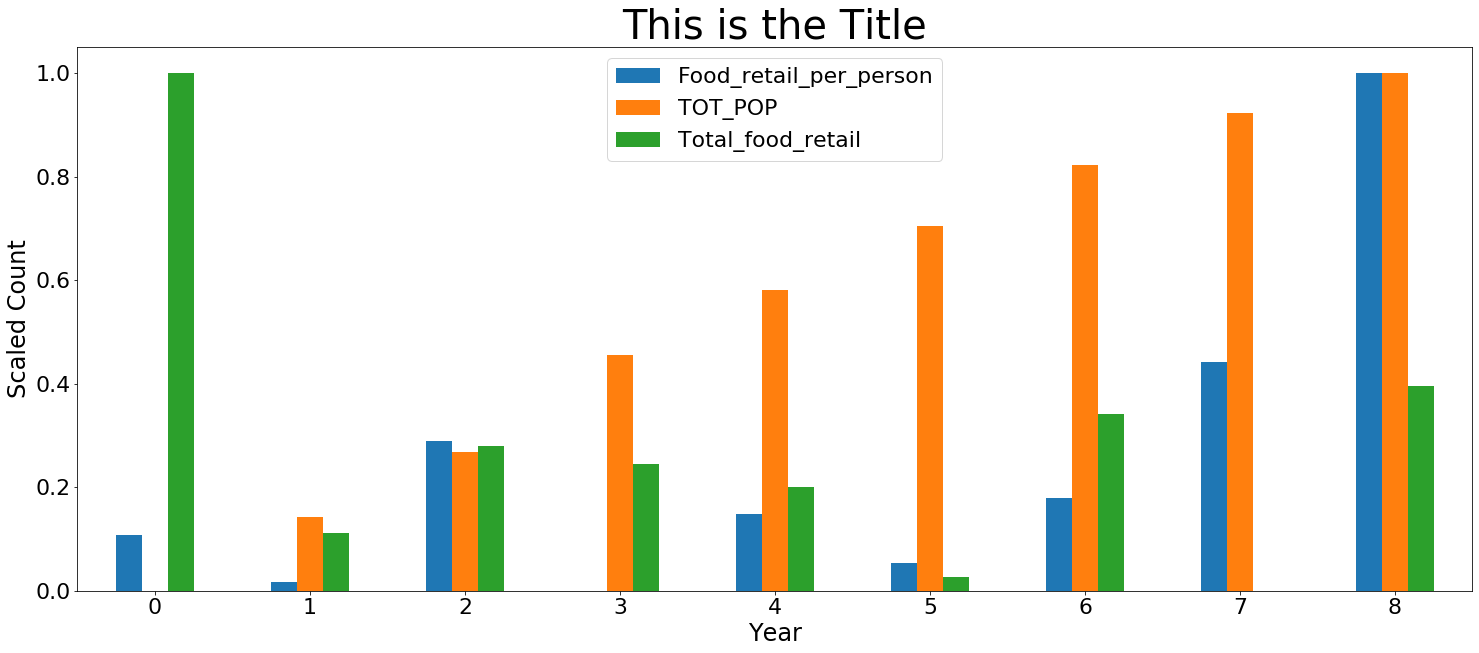

In [133]:
features = ['Food_retail_per_person','TOT_POP','Total_food_retail']
barchart(df,features, title='This is the Title')

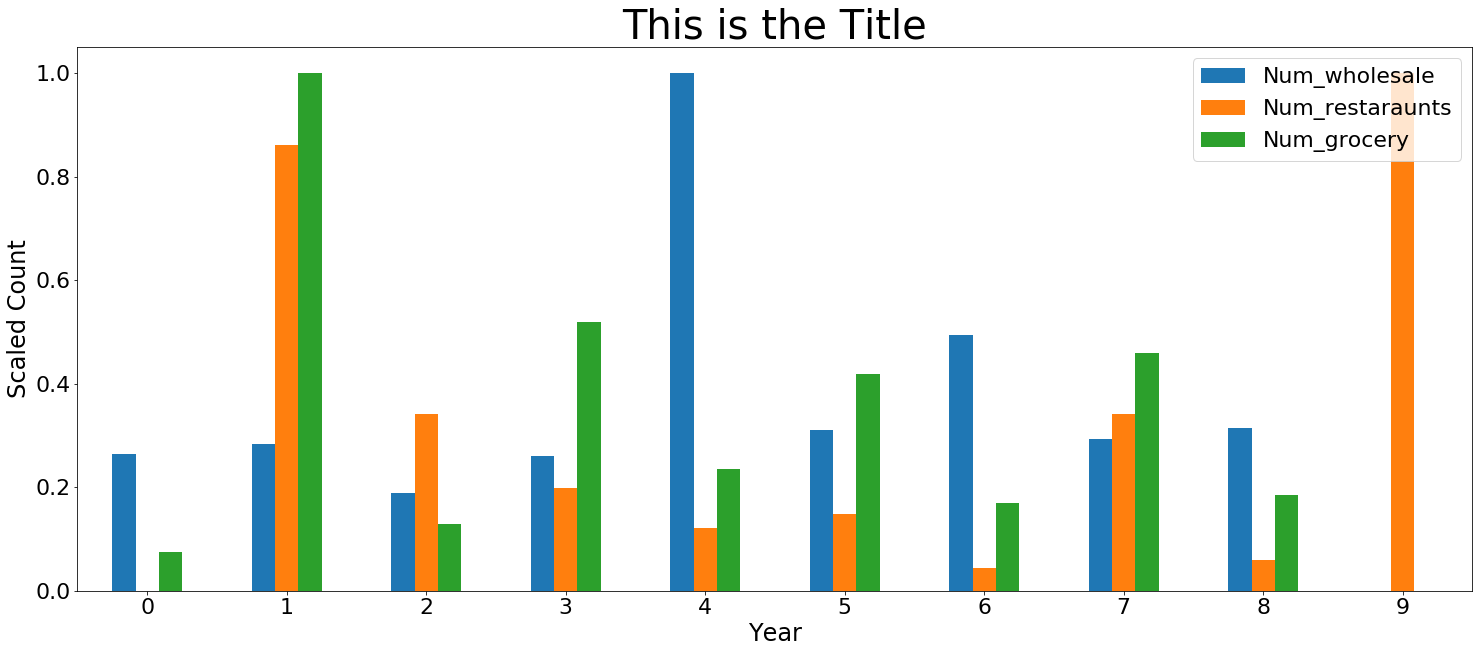

In [130]:
features = ['Num_wholesale','Num_restaraunts', 'Num_grocery']
barchart(df,features, title='This is the Title')

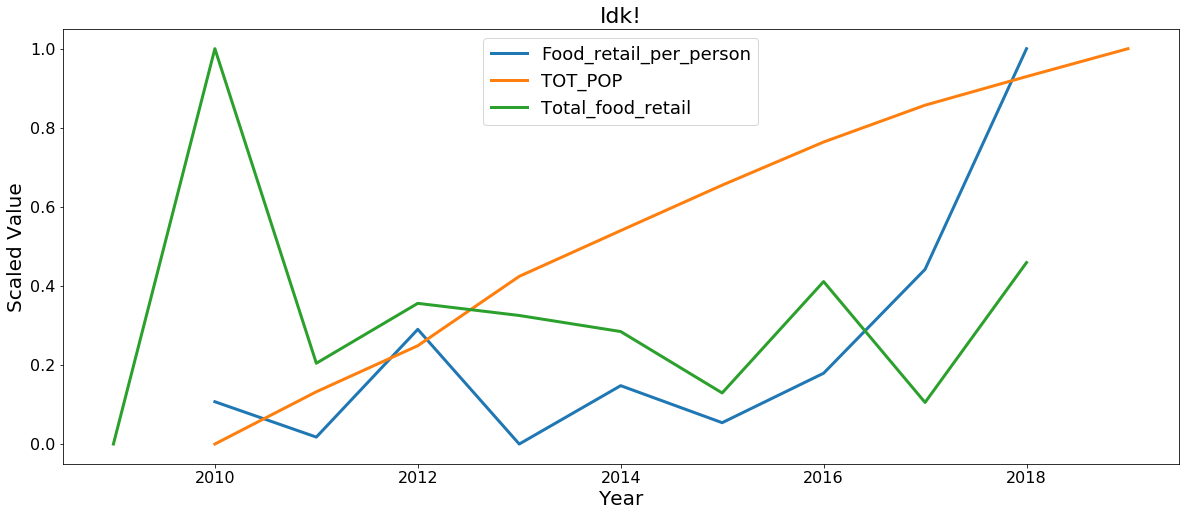

In [102]:
lineplot(df, ['Food_retail_per_person','TOT_POP','Total_food_retail'],title='Idk!')

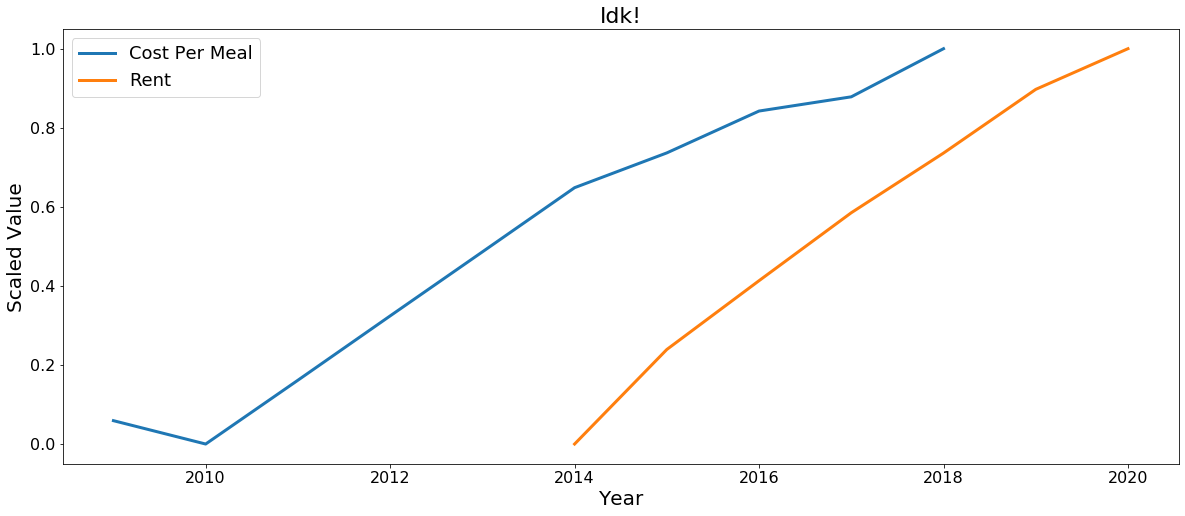

In [74]:
lineplot(df, ['Cost Per Meal','Rent'],title='Idk!')


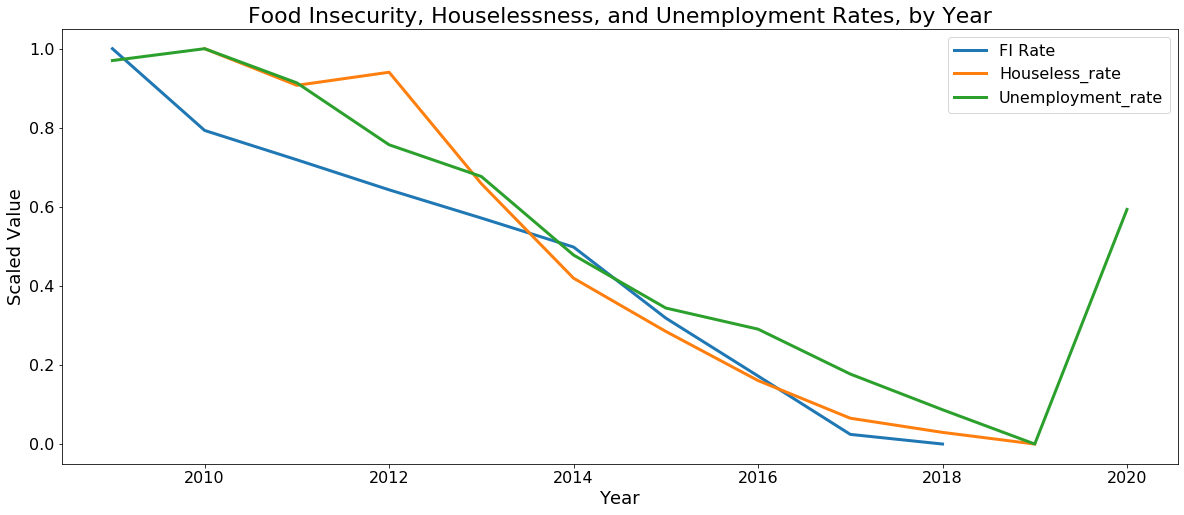

In [16]:
lineplot(df, ['FI Rate','Houseless_rate','Unemployment_rate'], title='Food Insecurity, Houselessness, and Unemployment Rates, by Year')

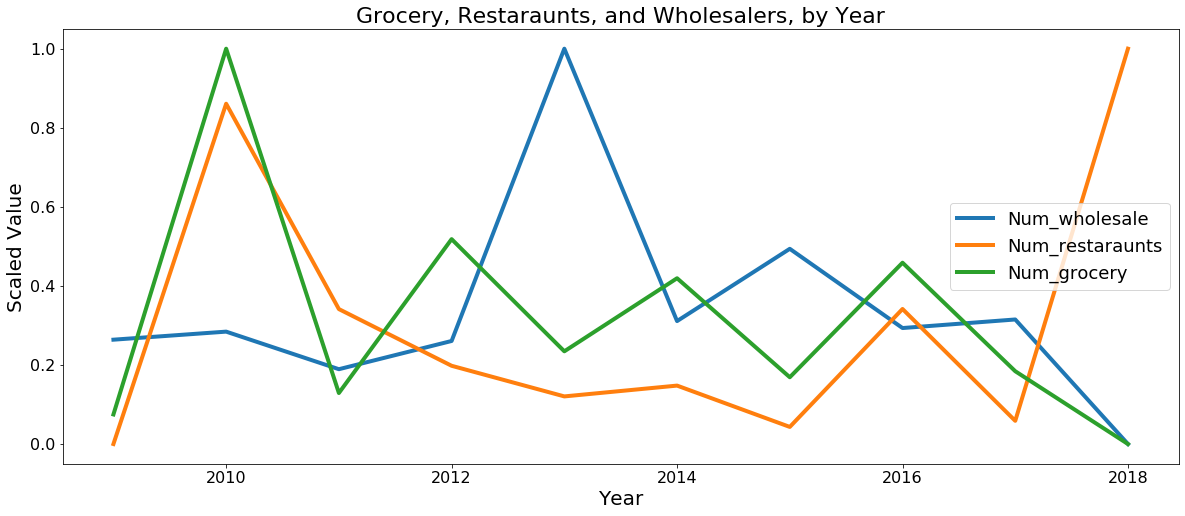

In [132]:
lineplot(df, ['Num_wholesale','Num_restaraunts', 'Num_grocery'], title='Grocery, Restaraunts, and Wholesalers, by Year')

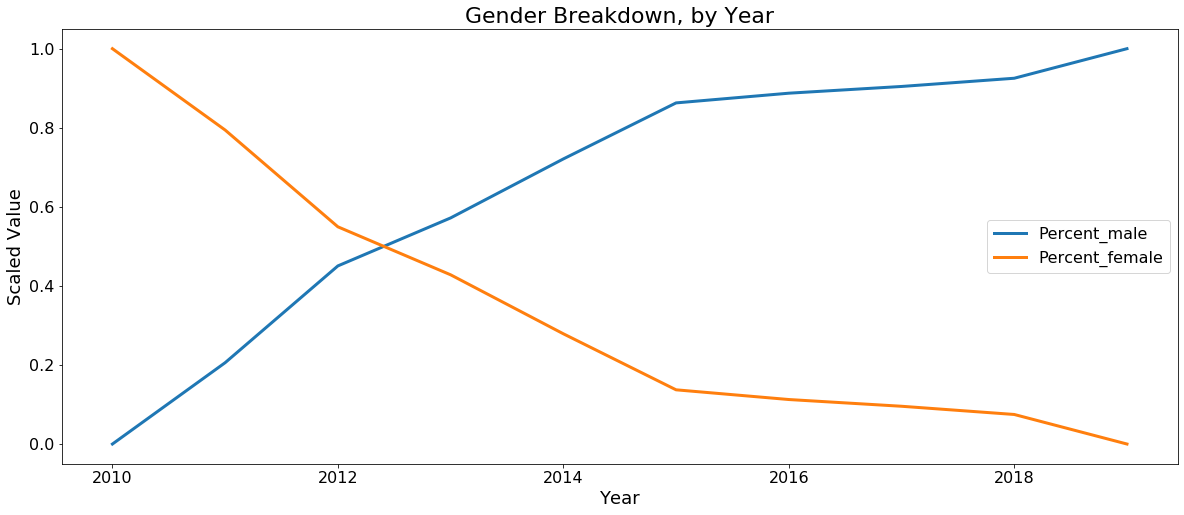

In [15]:
lineplot(df, ['Percent_male', 'Percent_female'], title='Gender Breakdown, by Year')

In [131]:
def lineplot(df, features, title=None):

    plt.figure(figsize=(20, 8));

    for feat in features:
        x = df.groupby("Year")[feat].mean().reset_index().dropna()
        y = (x[feat] - min(x[feat])) / (max(x[feat]) - min(x[feat]))
        ax= sns.lineplot(x=x['Year'].astype(int), y= y, label=feat, linewidth = 4)
    ax.set_title(title, fontsize=22);
    ax.set_ylabel('Scaled Value', fontsize=20);
    ax.set_xlabel('Year', fontsize=20);
    ax.legend(prop=dict(size=18));
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);


# Analysis Question 2: Which geographic areas have the highest rates of unemployment, houselessness, food insecurity?
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, crest, crest_r, cubehelix, cubehelix_r, flag, flag_r, flare, flare_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

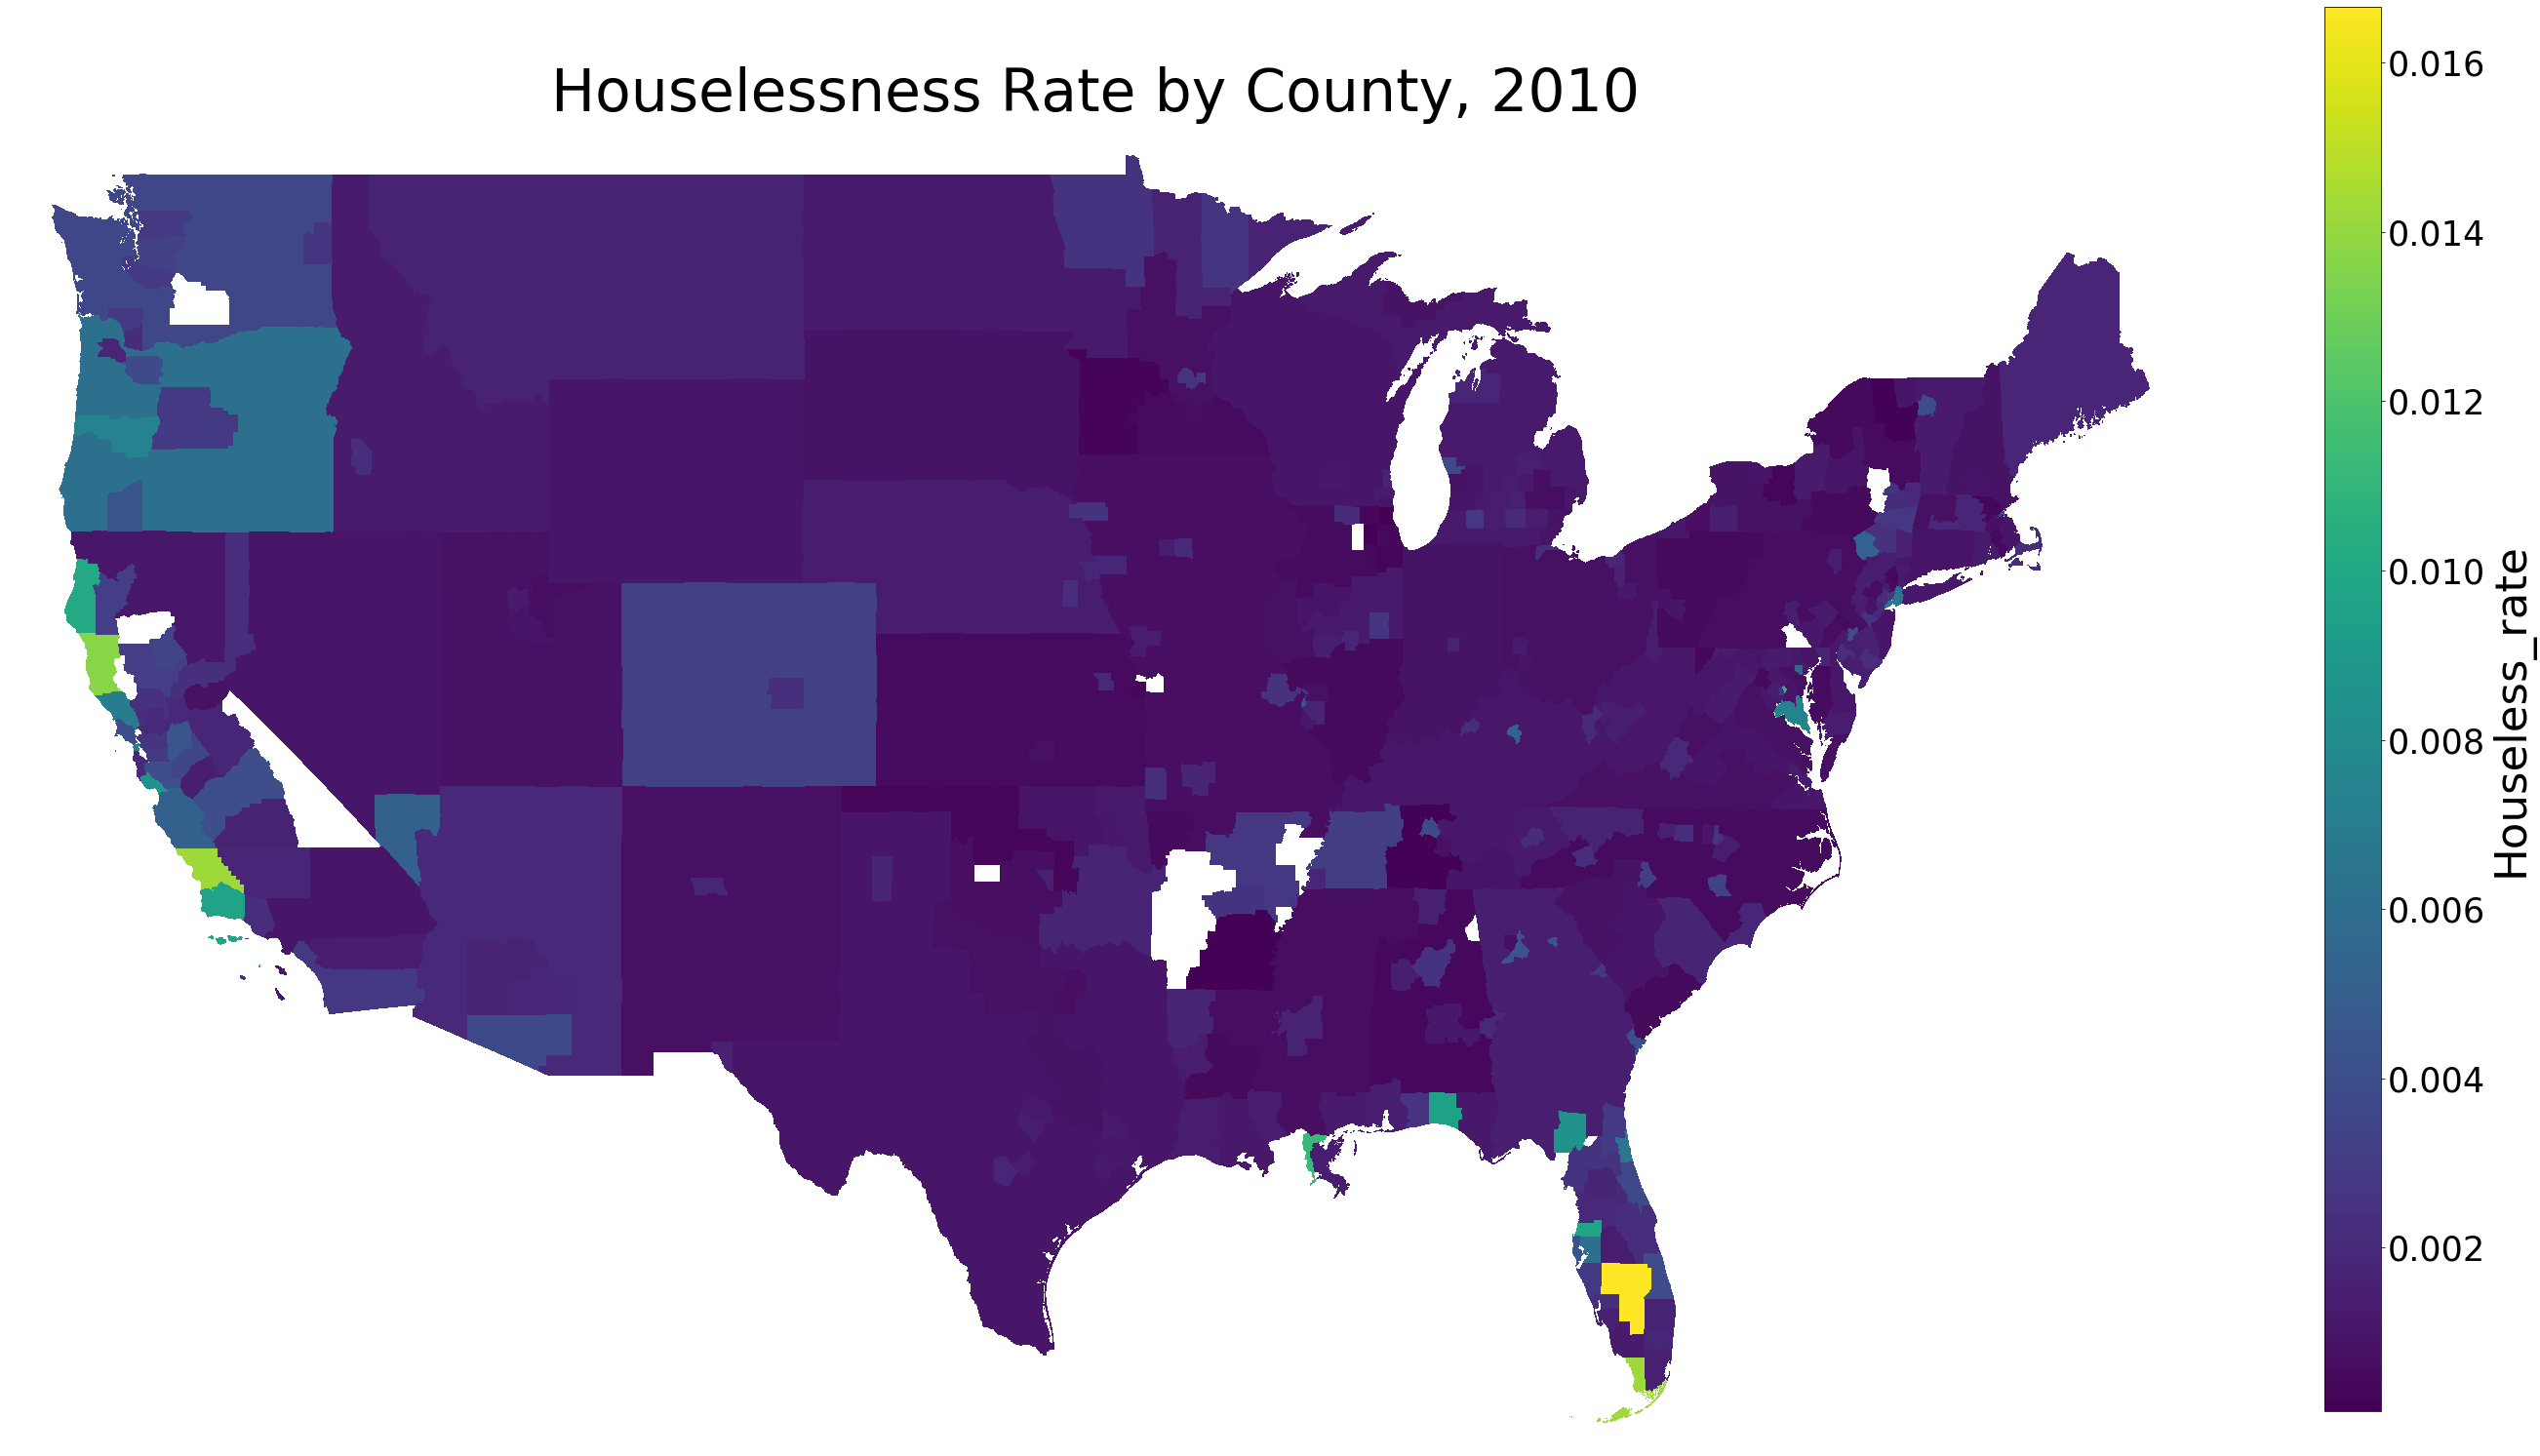

In [39]:
choropleth(df, 'Houseless_rate', '2010', "viridis", 'Houselessness Rate')

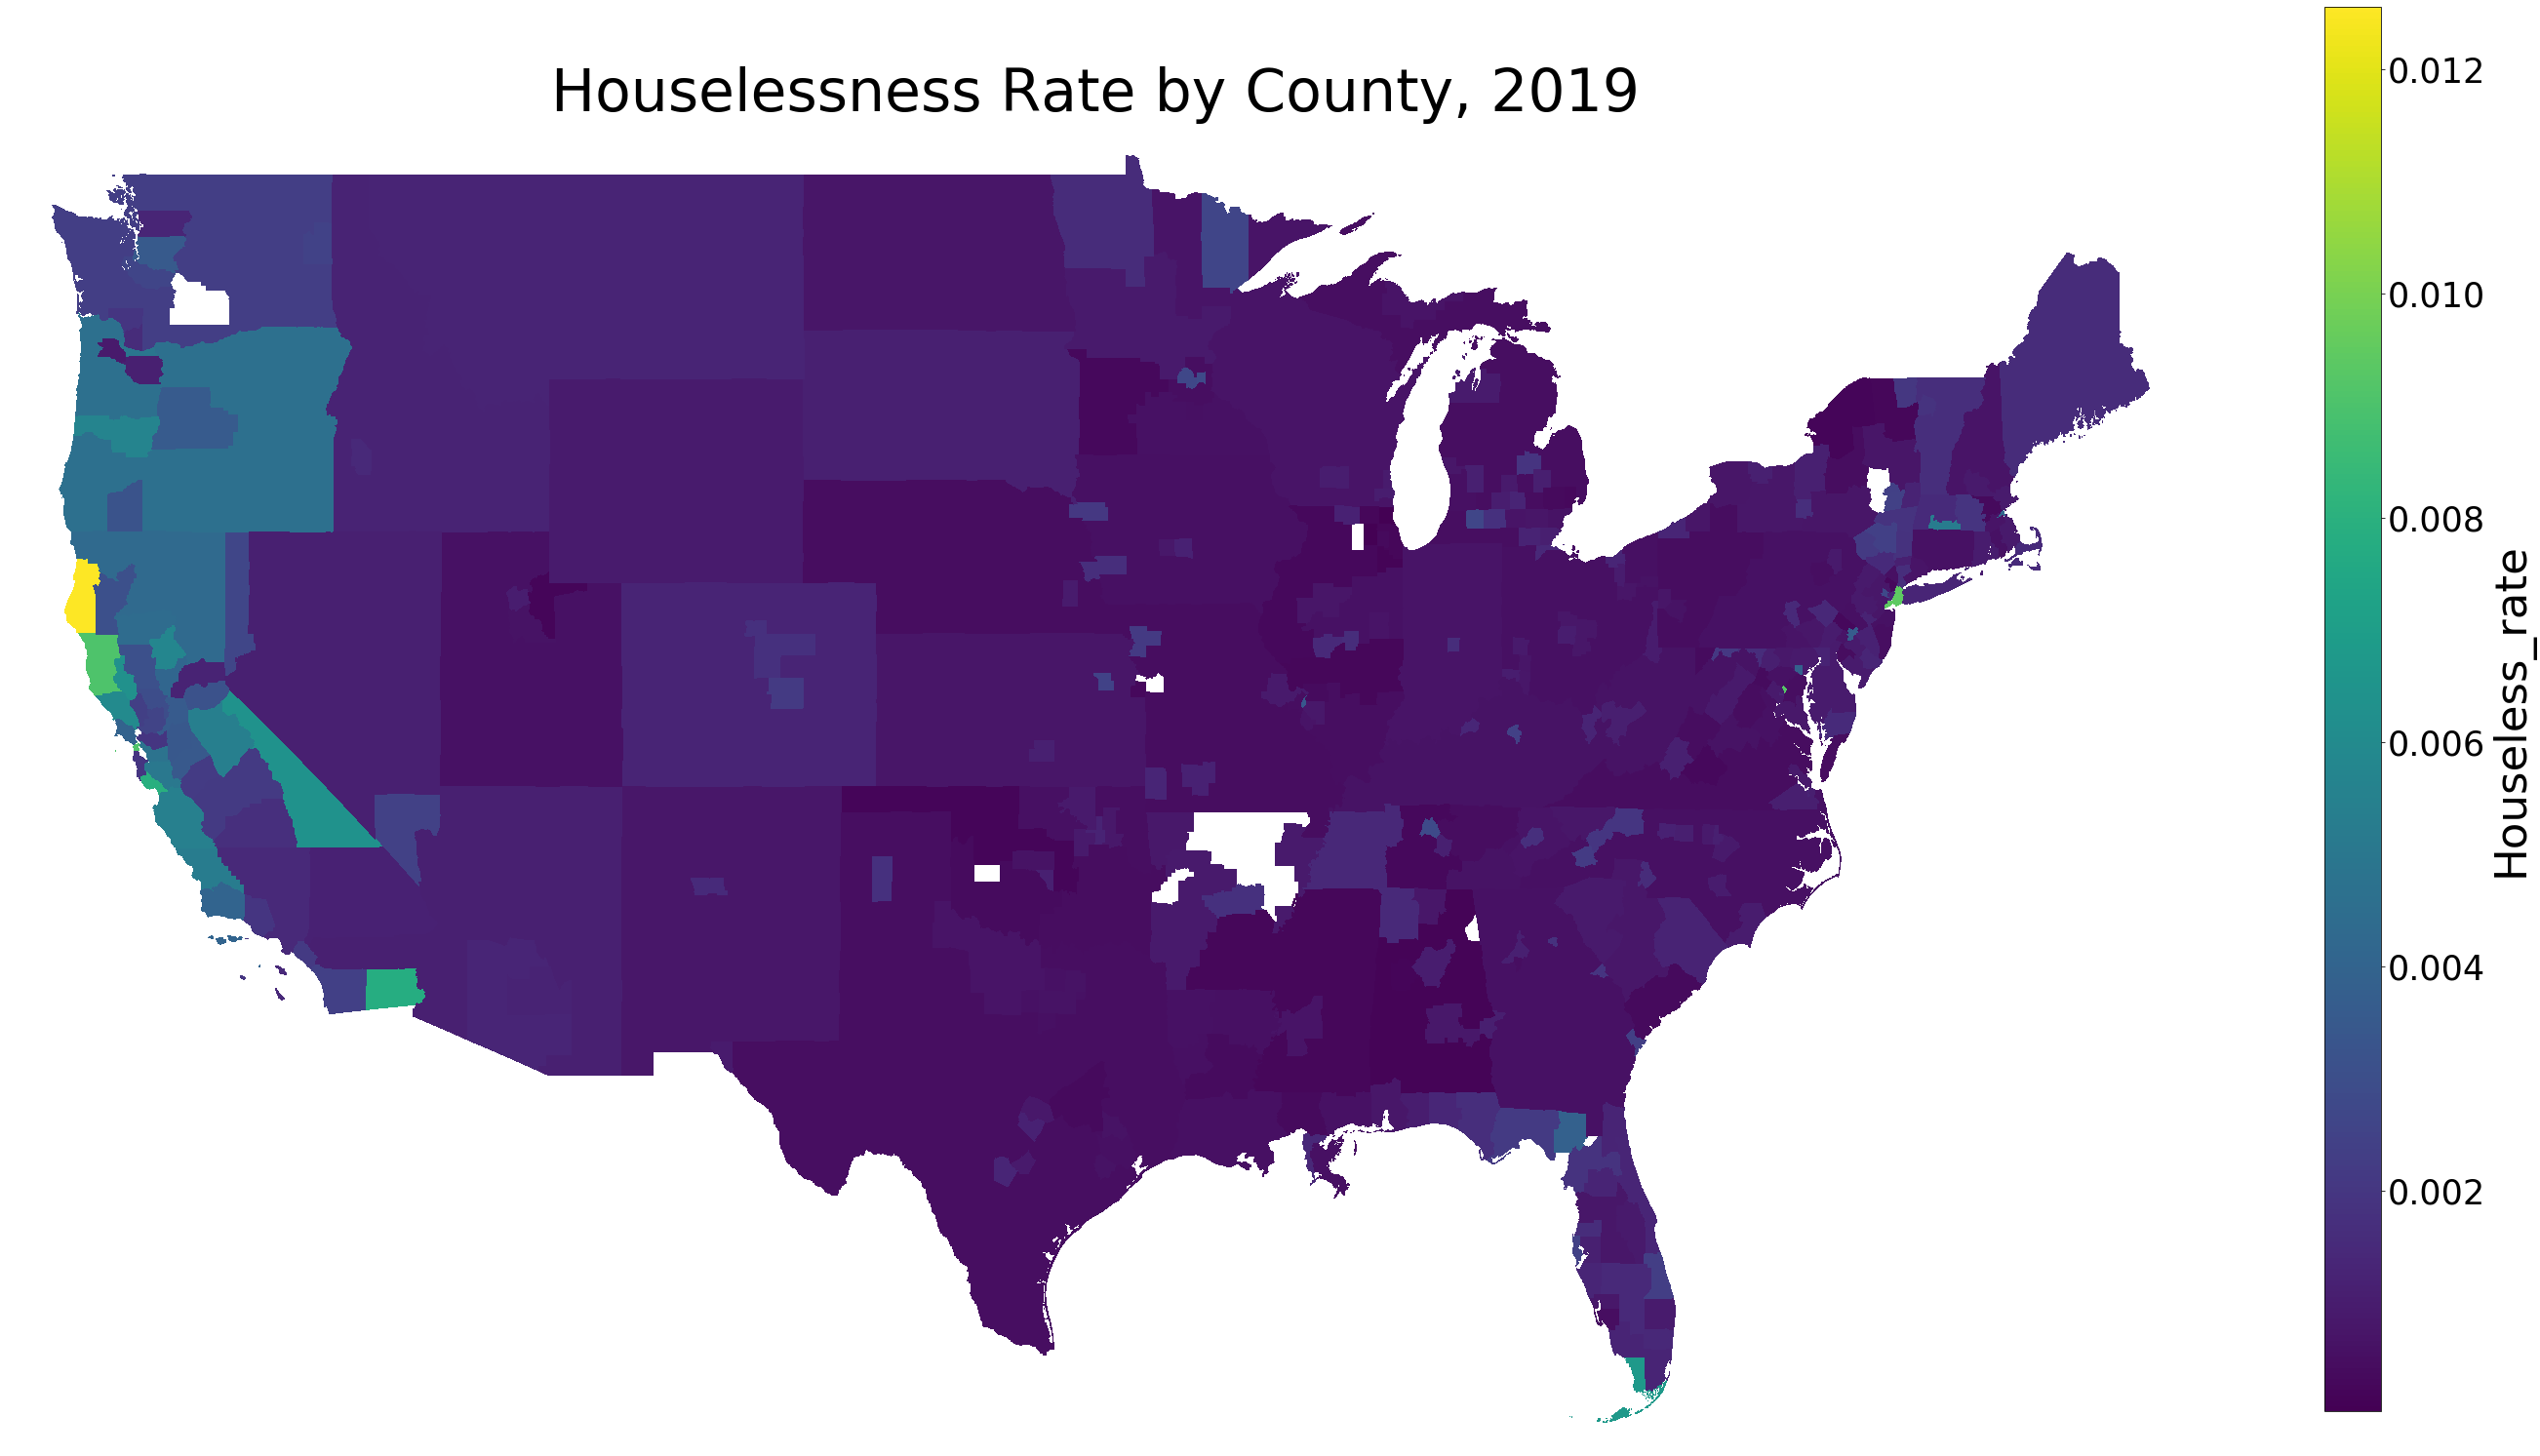

In [40]:
choropleth(df, 'Houseless_rate', '2019', 'viridis', 'Houselessness Rate')

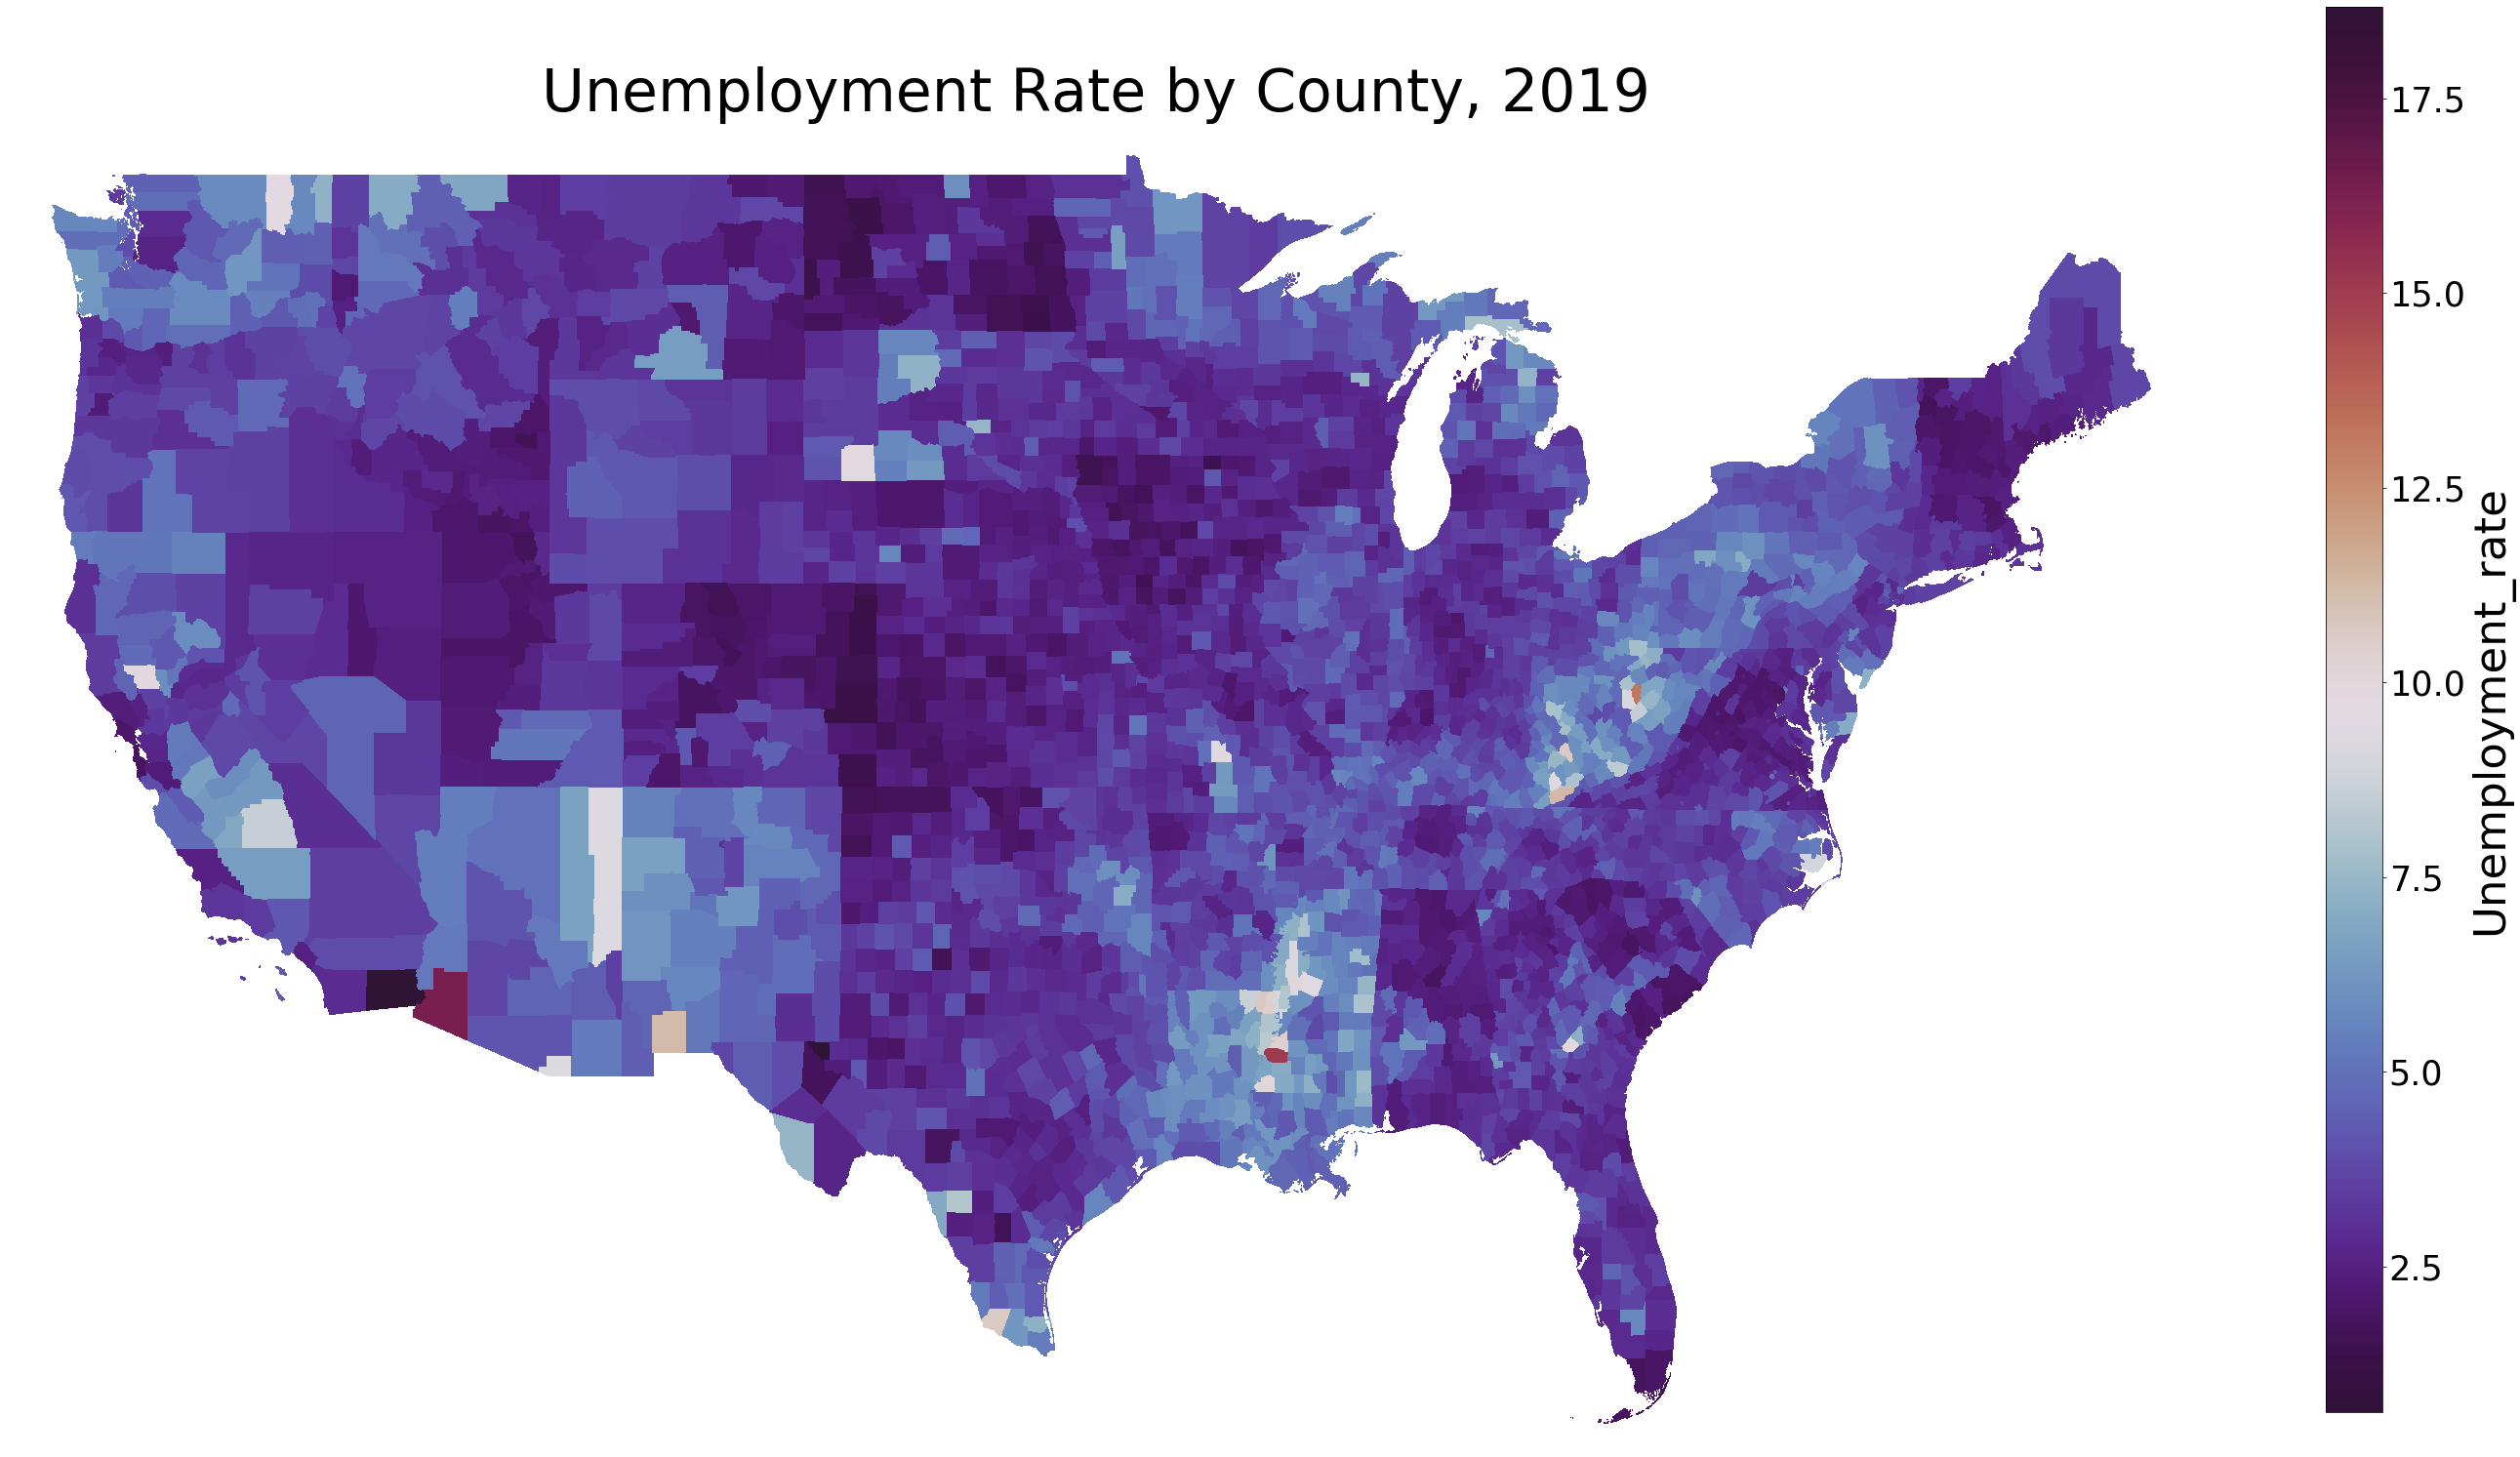

In [38]:
choropleth(df, 'Unemployment_rate', '2019', 'twilight_shifted', title='Unemployment Rate')

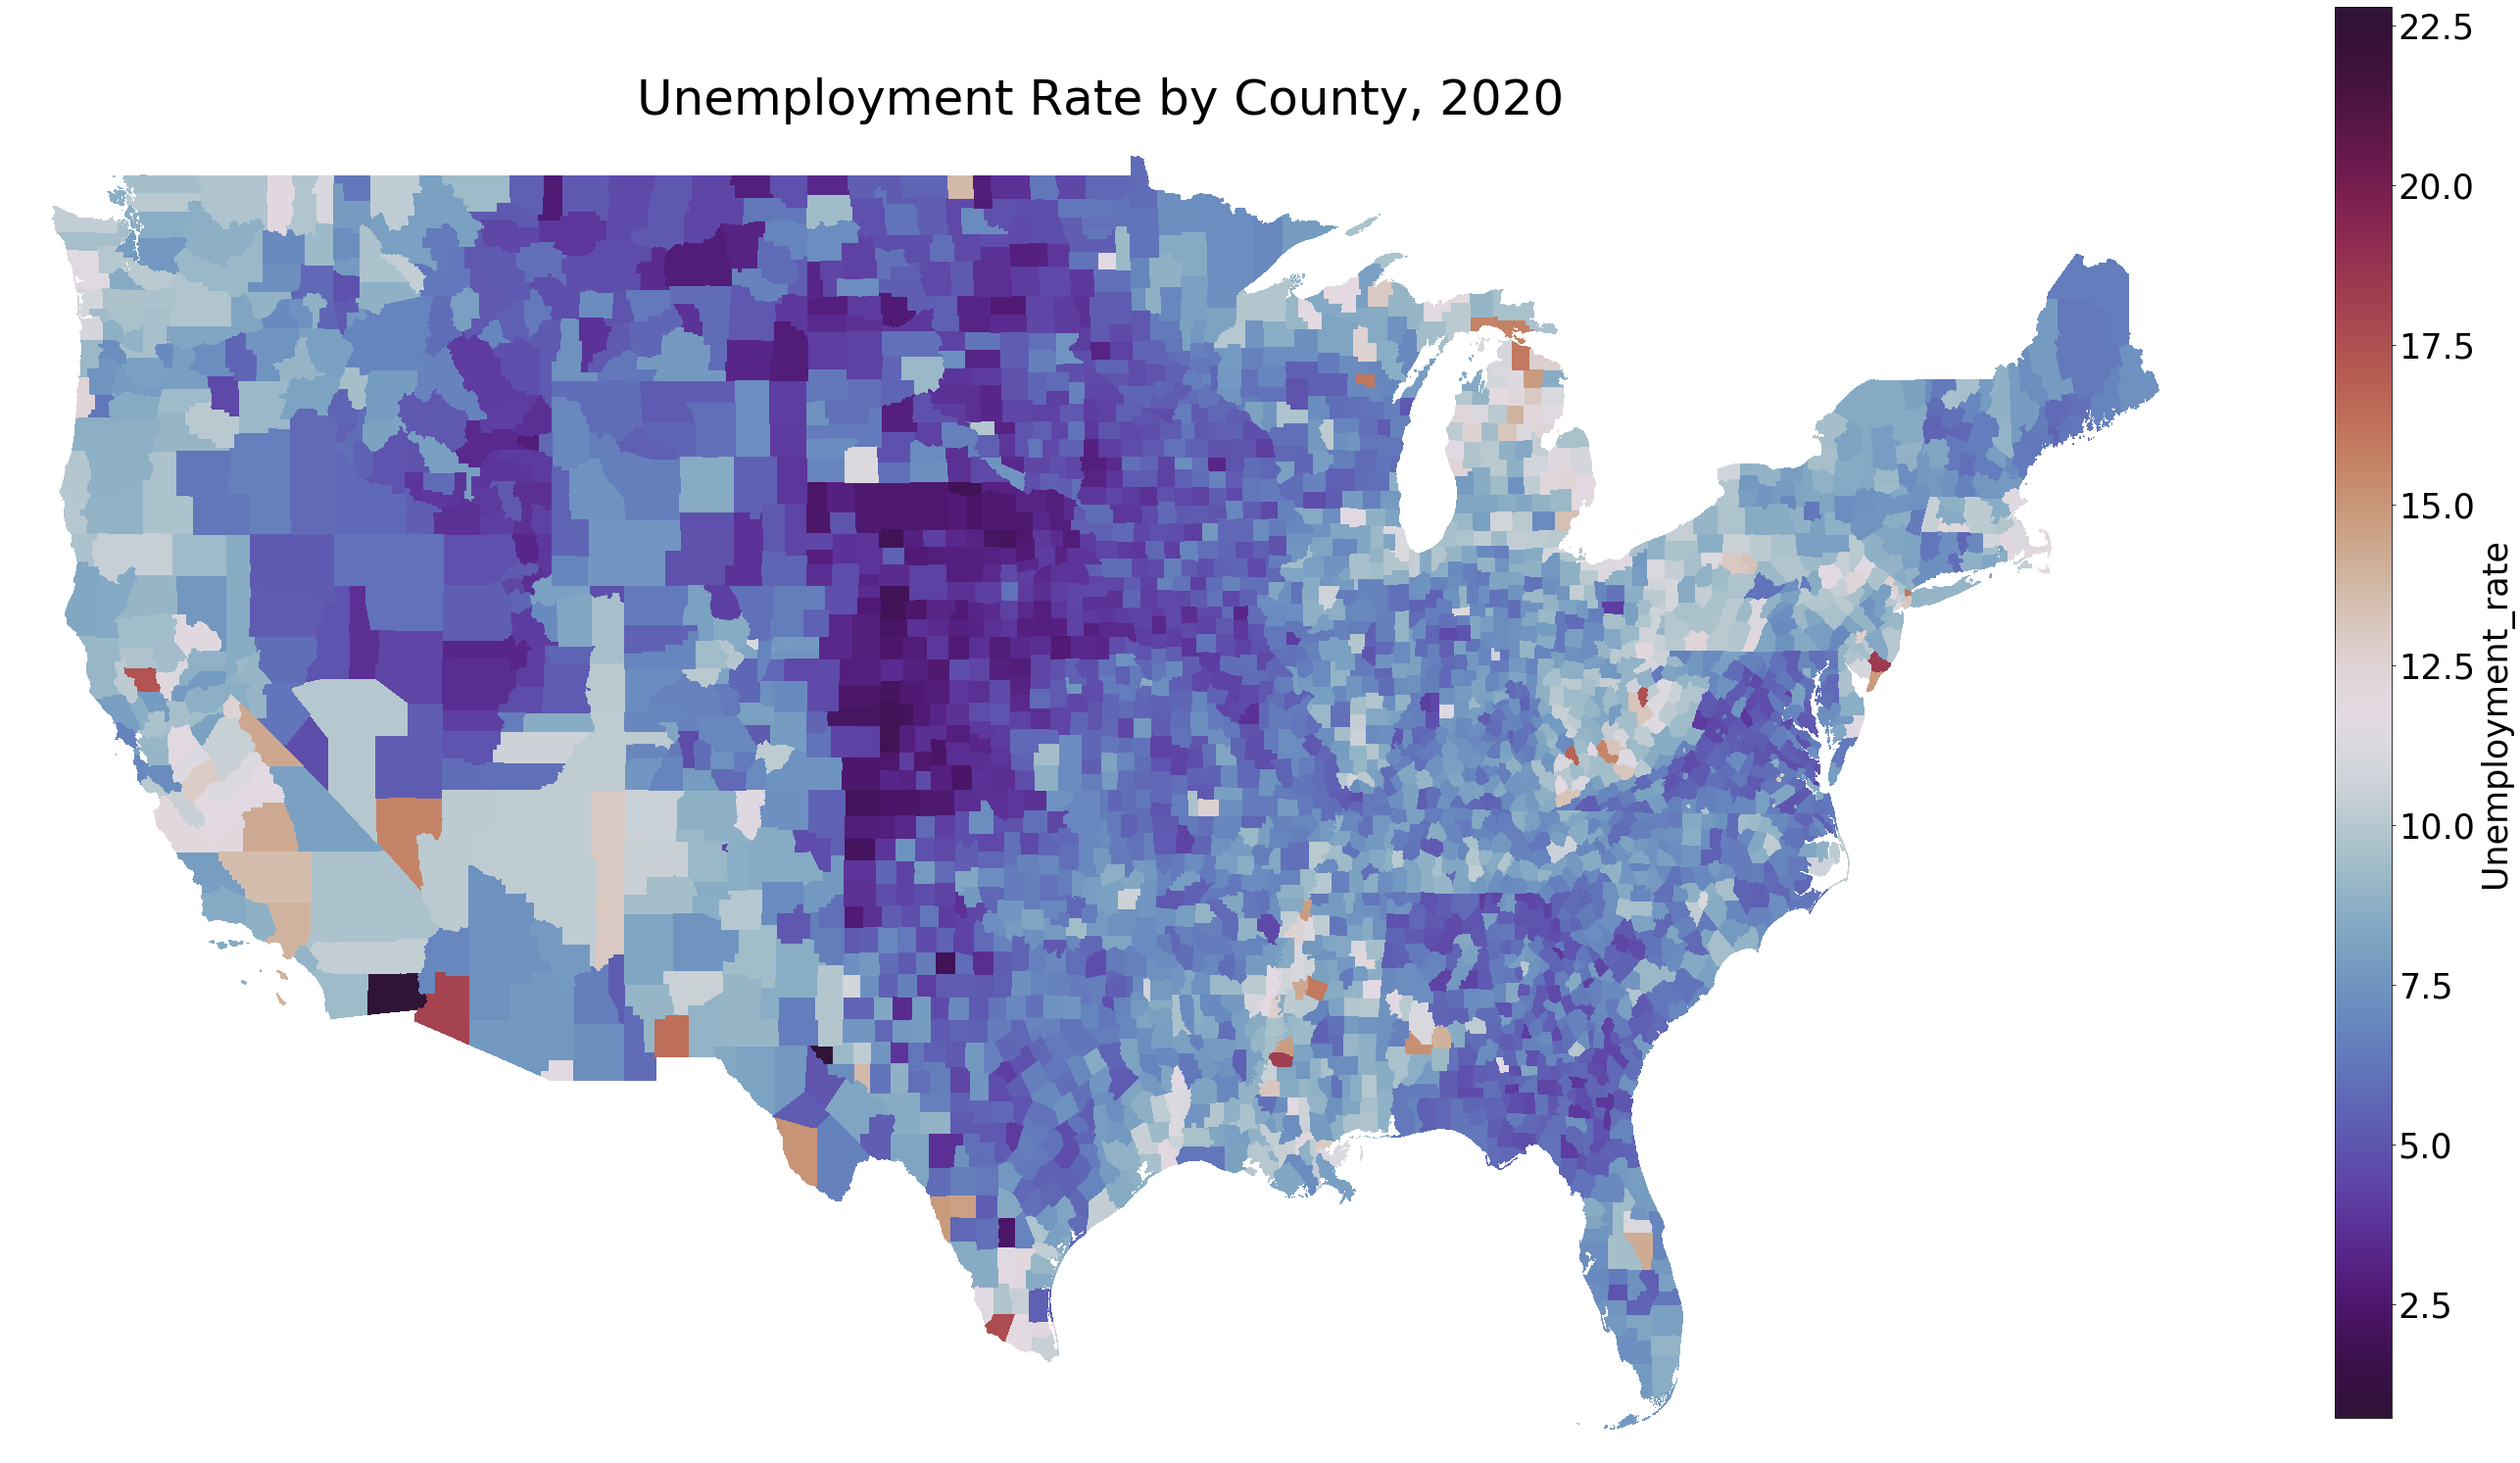

In [30]:
choropleth(df, 'Unemployment_rate', '2020', 'twilight_shifted',title='Unemployment Rate')

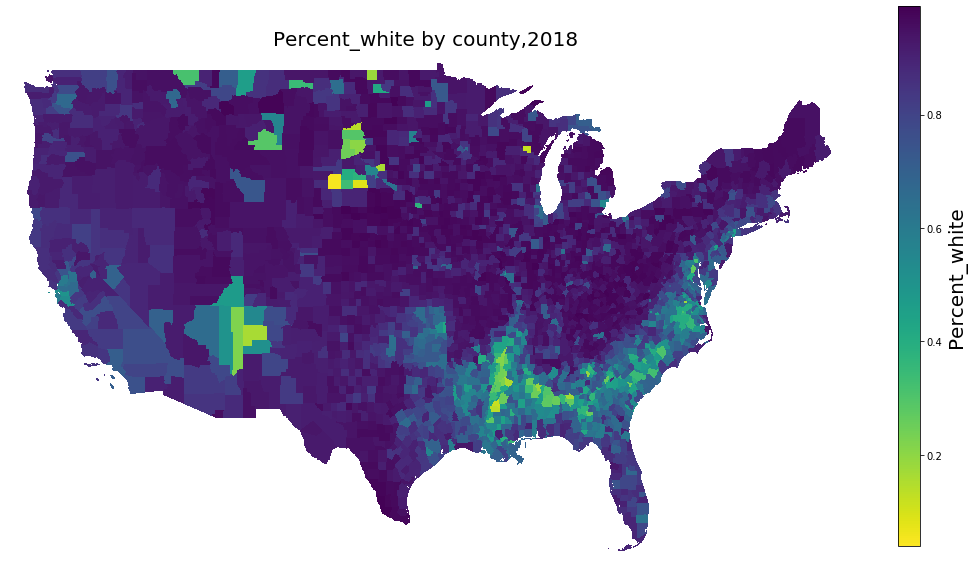

In [258]:
choropleth(df, 'Percent_white', '2018', 'viridis_r', '')

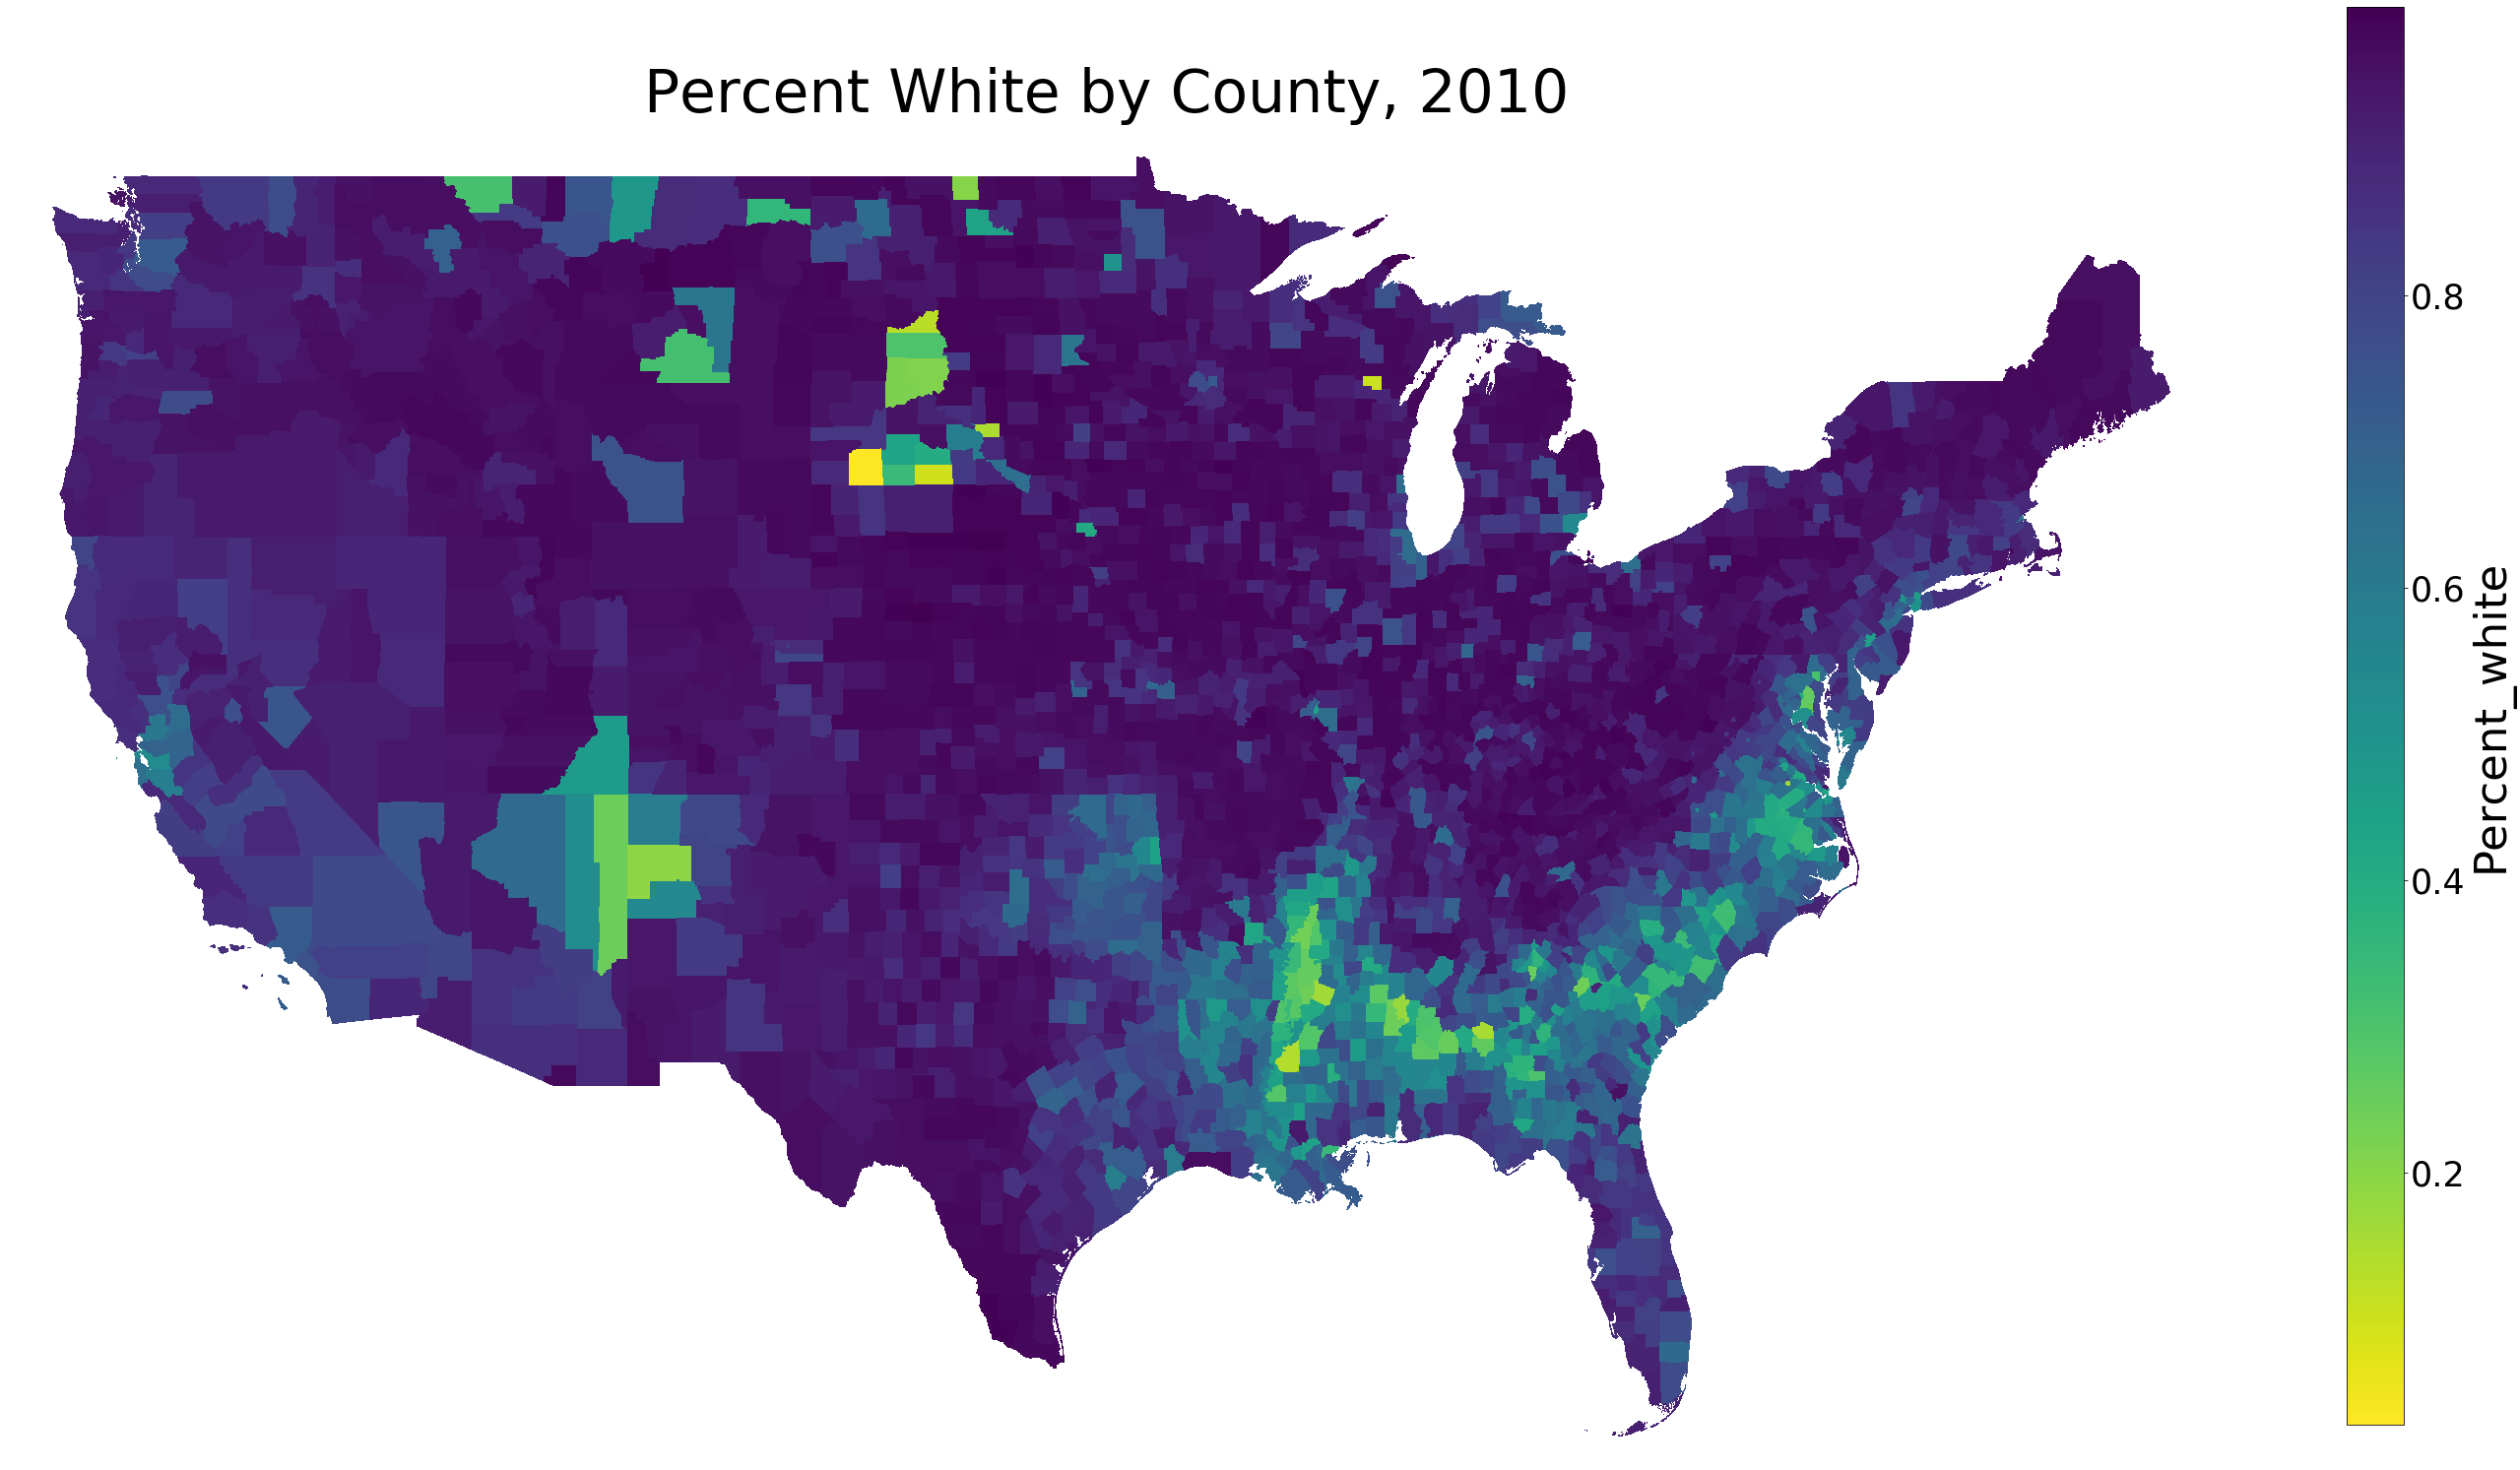

In [35]:
choropleth(df, 'Percent_white', '2010', 'viridis_r', 'White Population Percentage')

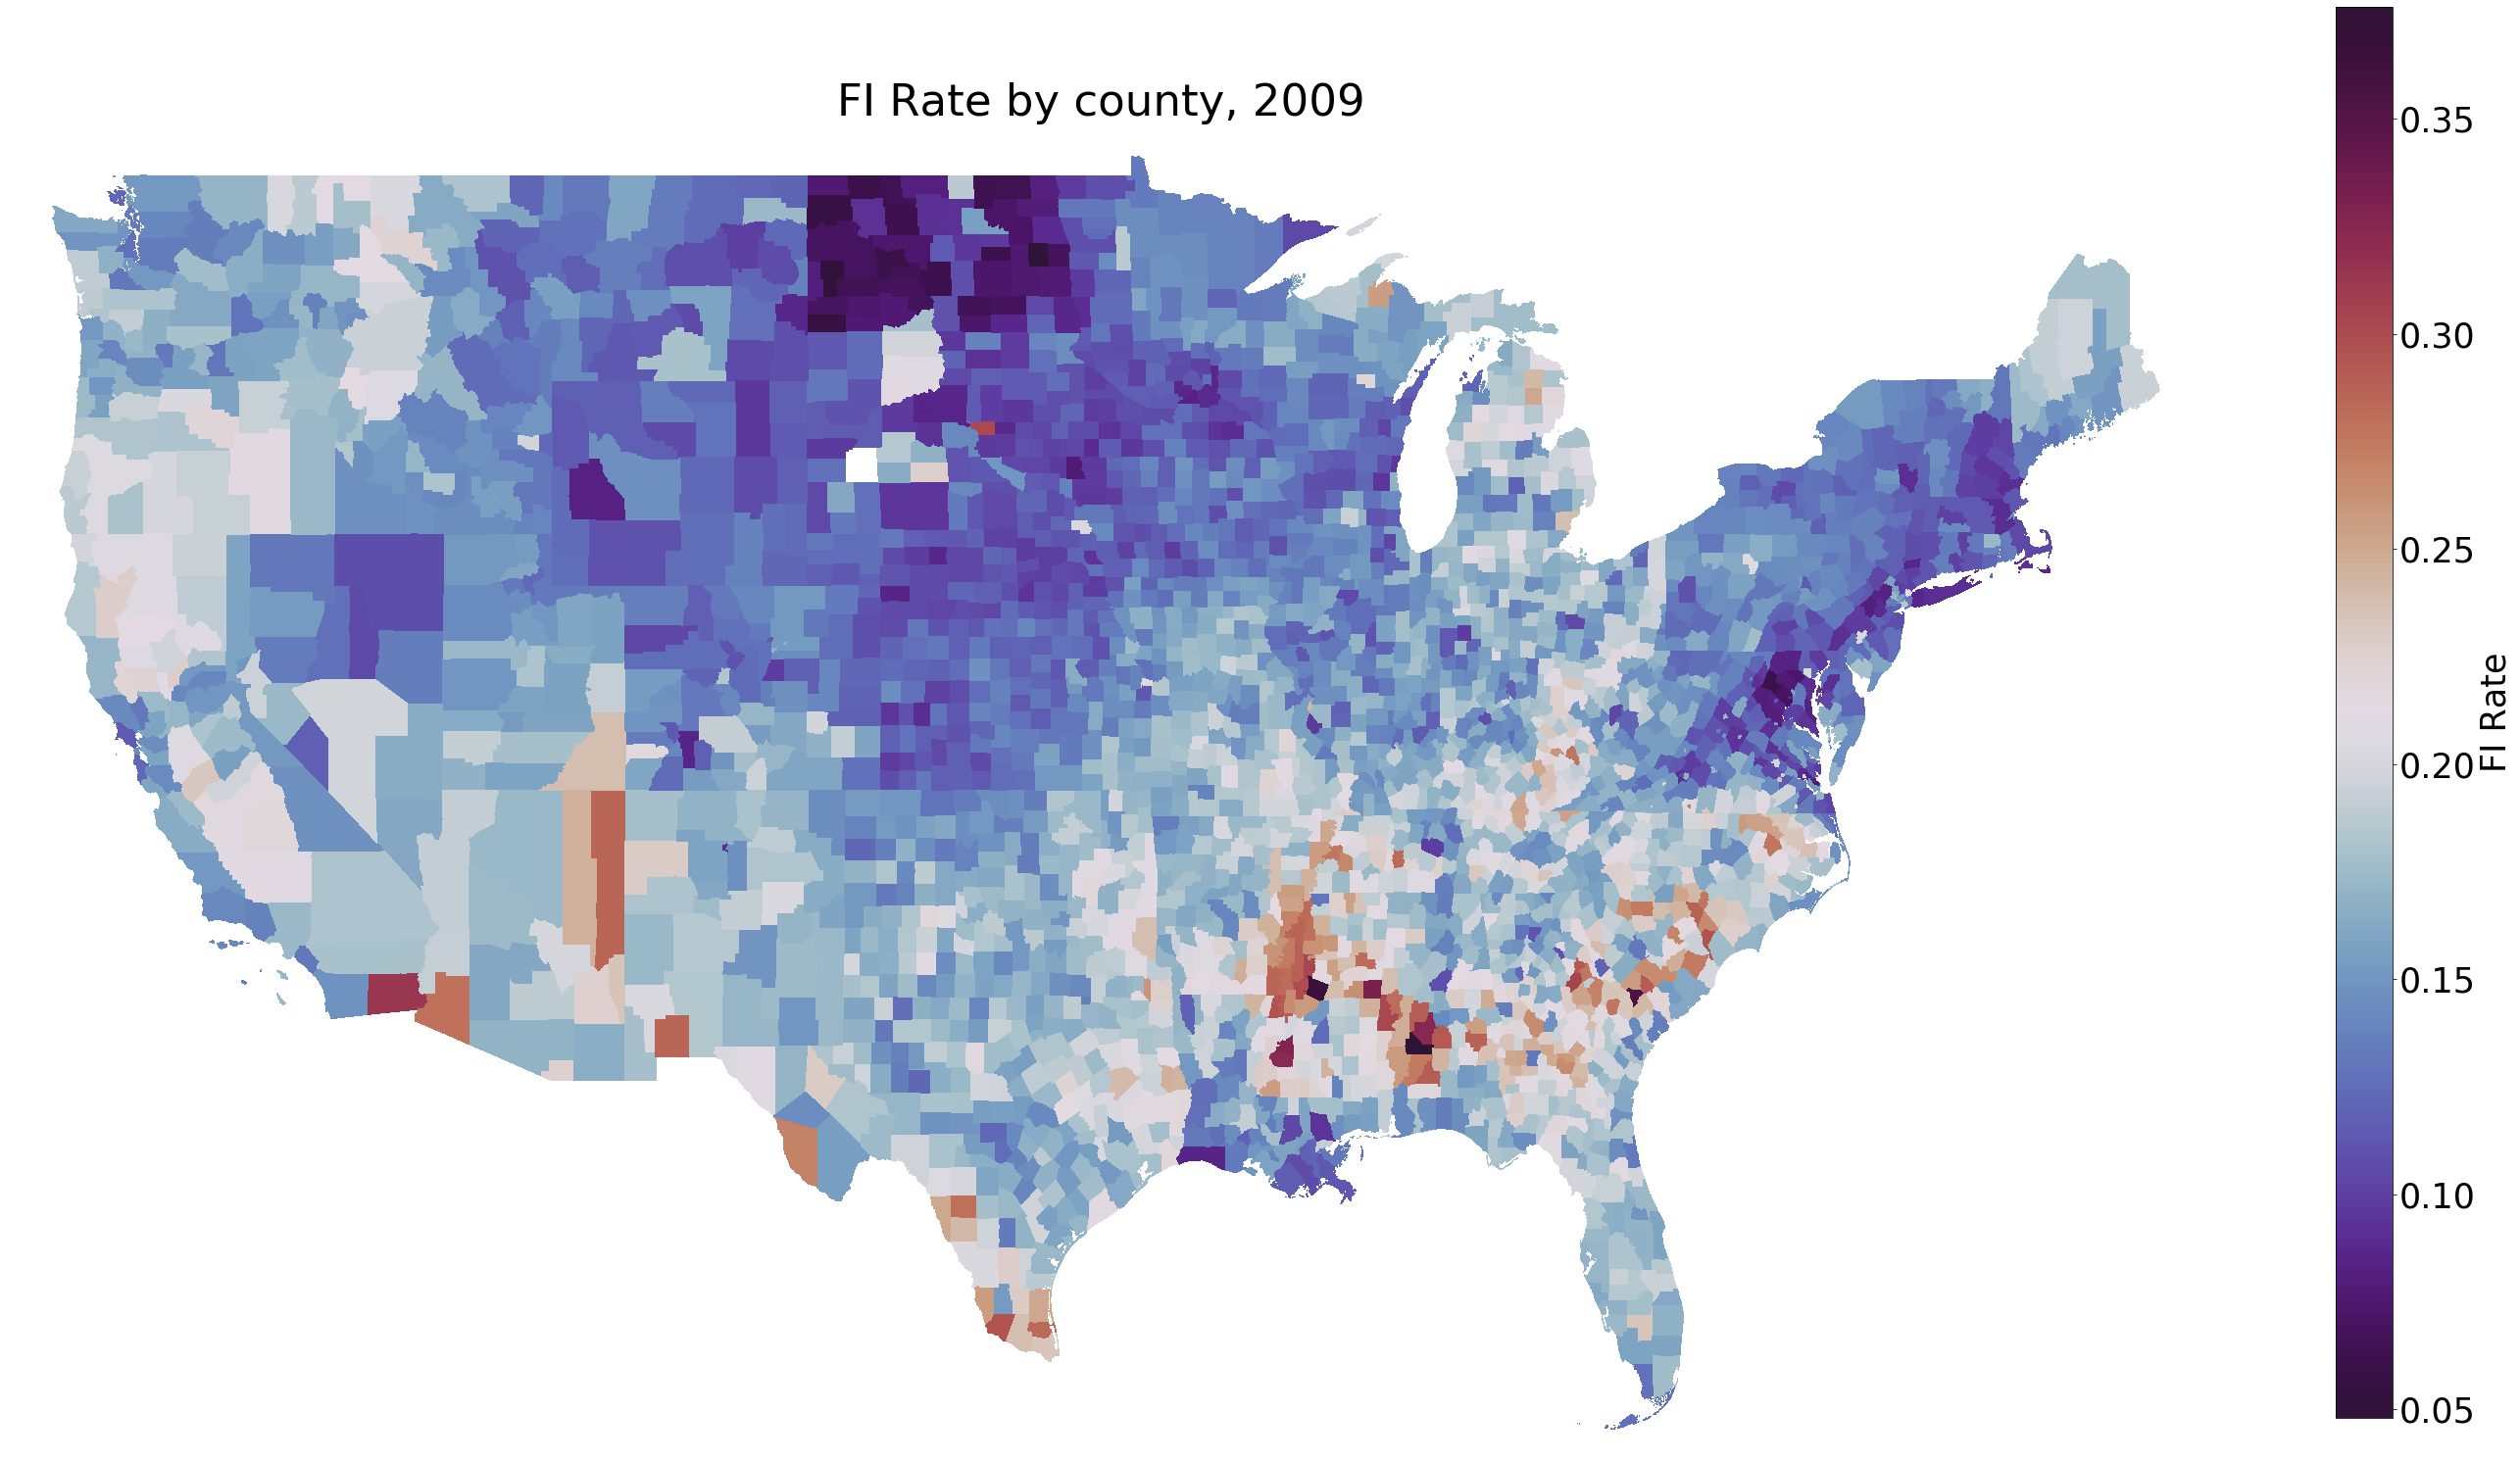

In [280]:
choropleth(df, 'FI Rate', '2009', 'twilight_shifted', 'Food Insecurity Rate')

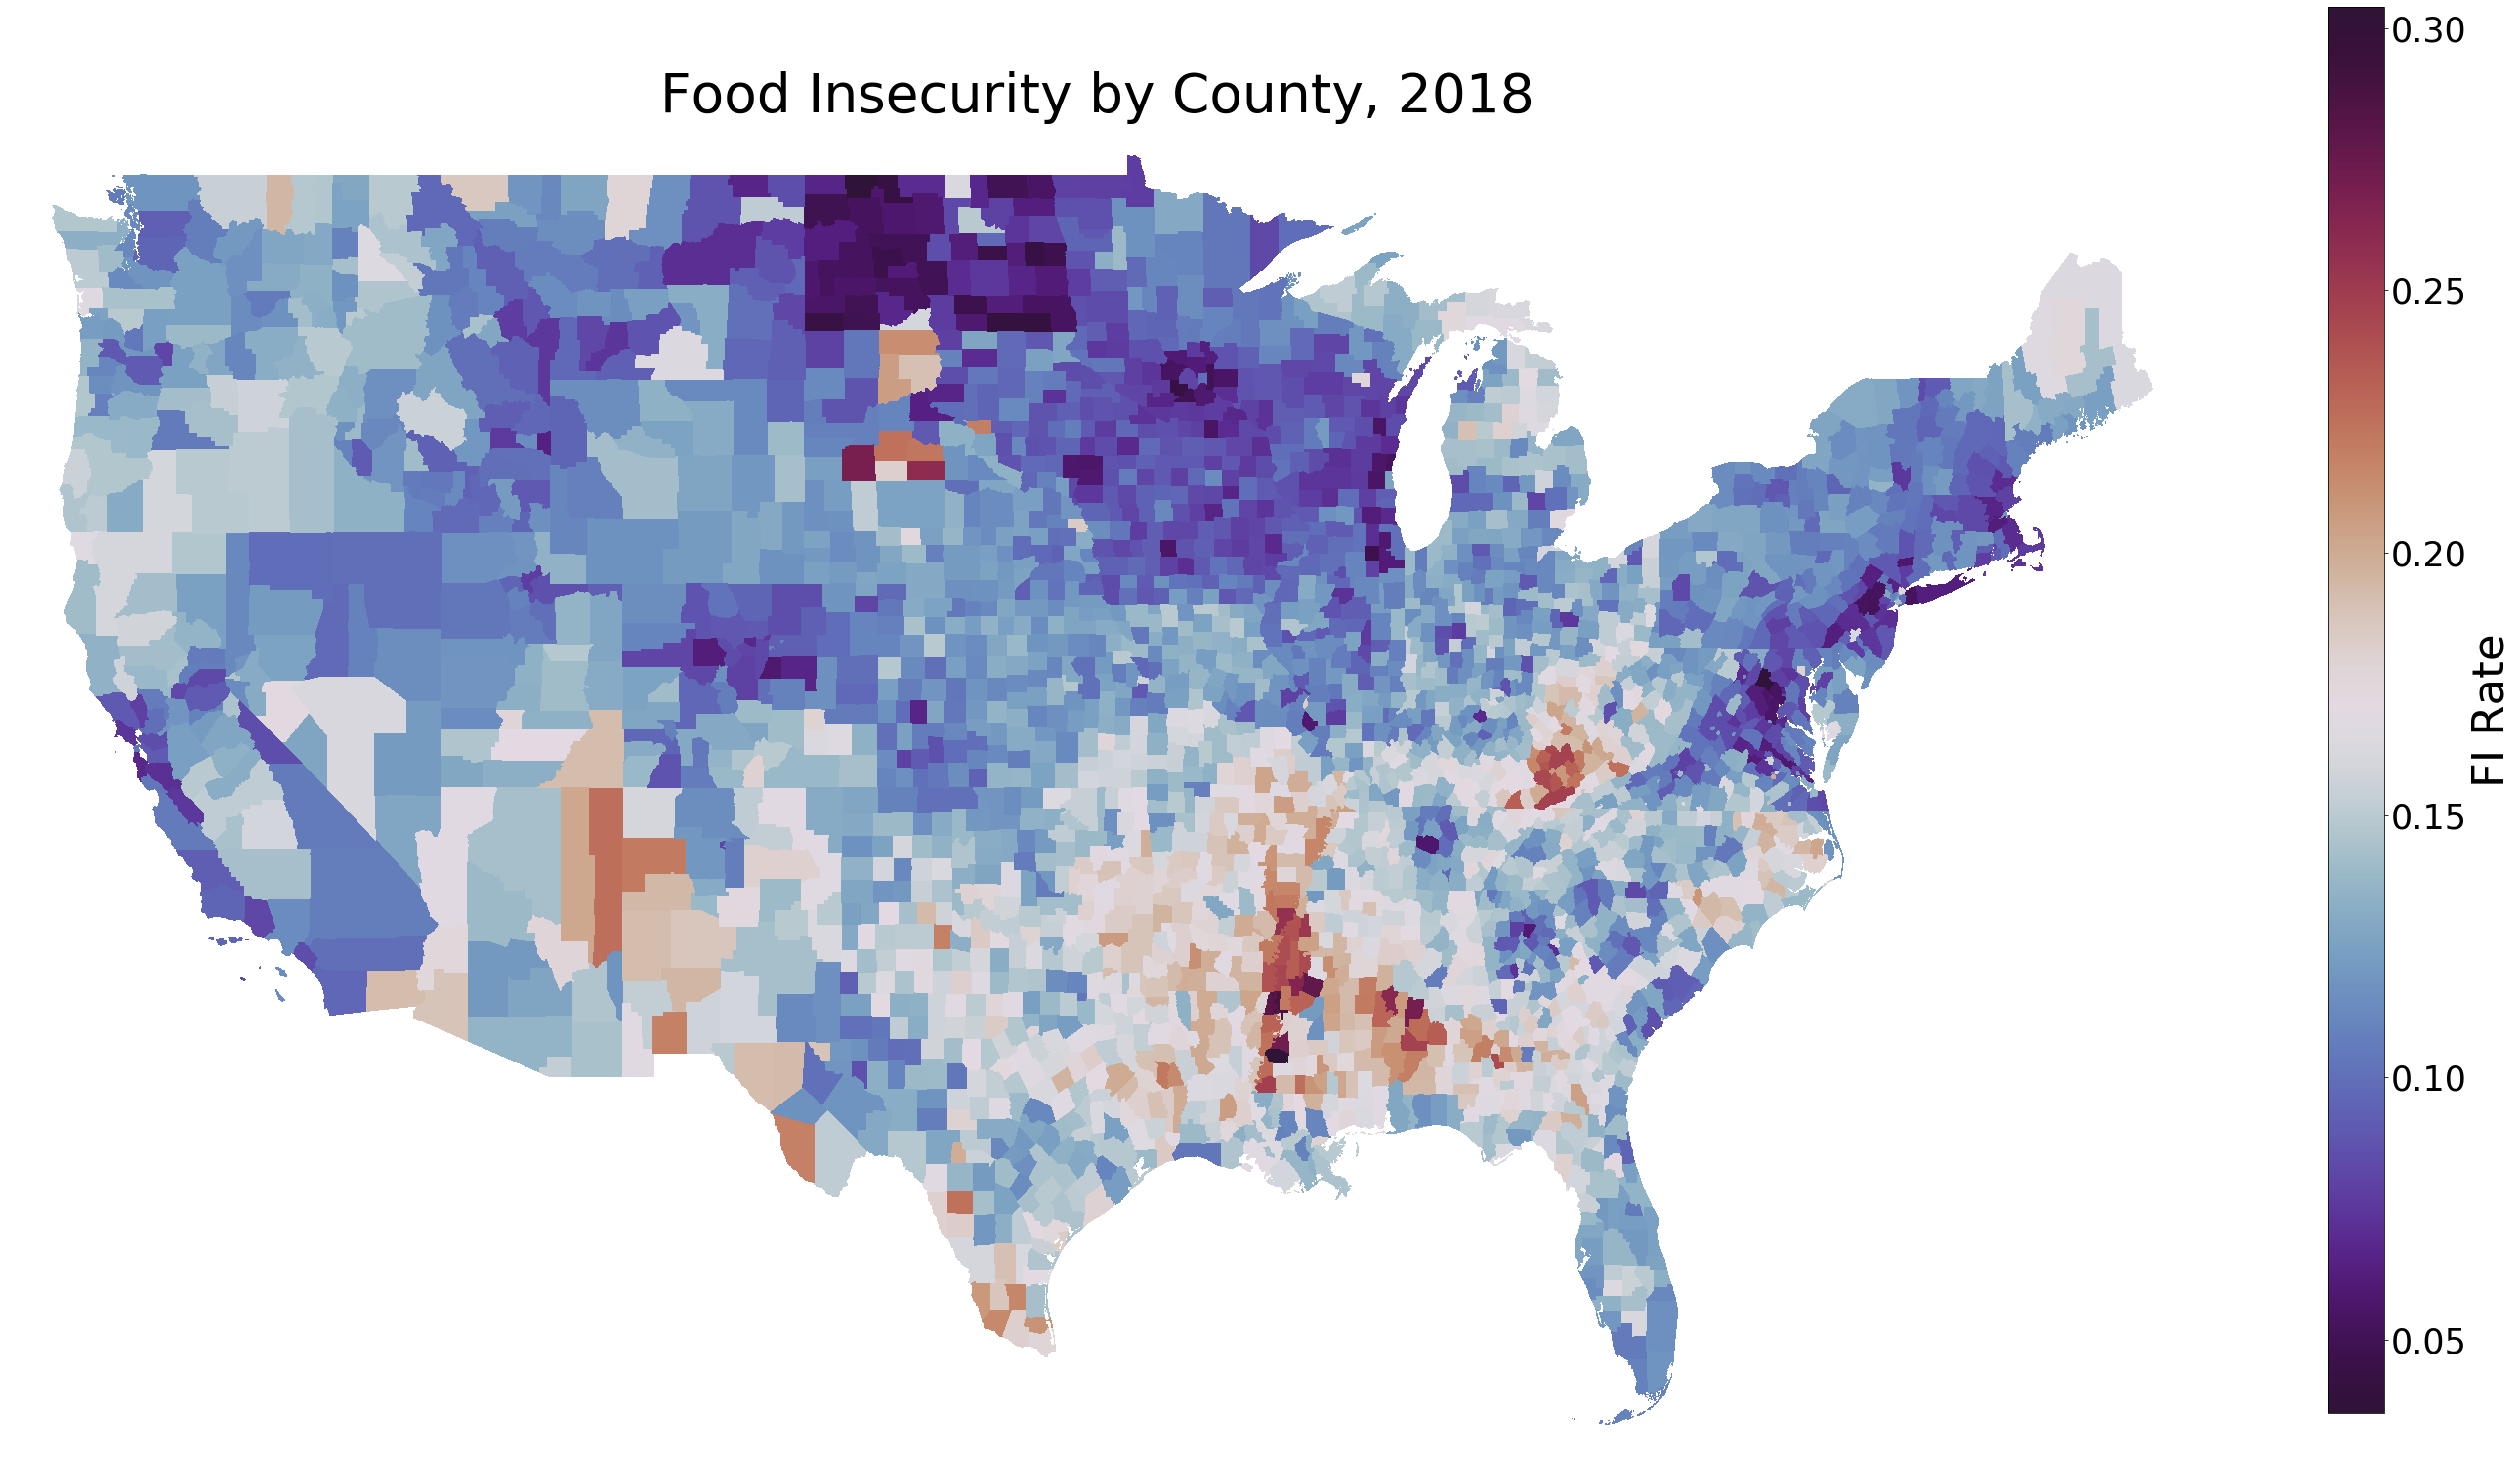

In [32]:
choropleth(df, 'FI Rate', '2018', 'twilight_shifted', 'Food Insecurity Rate')

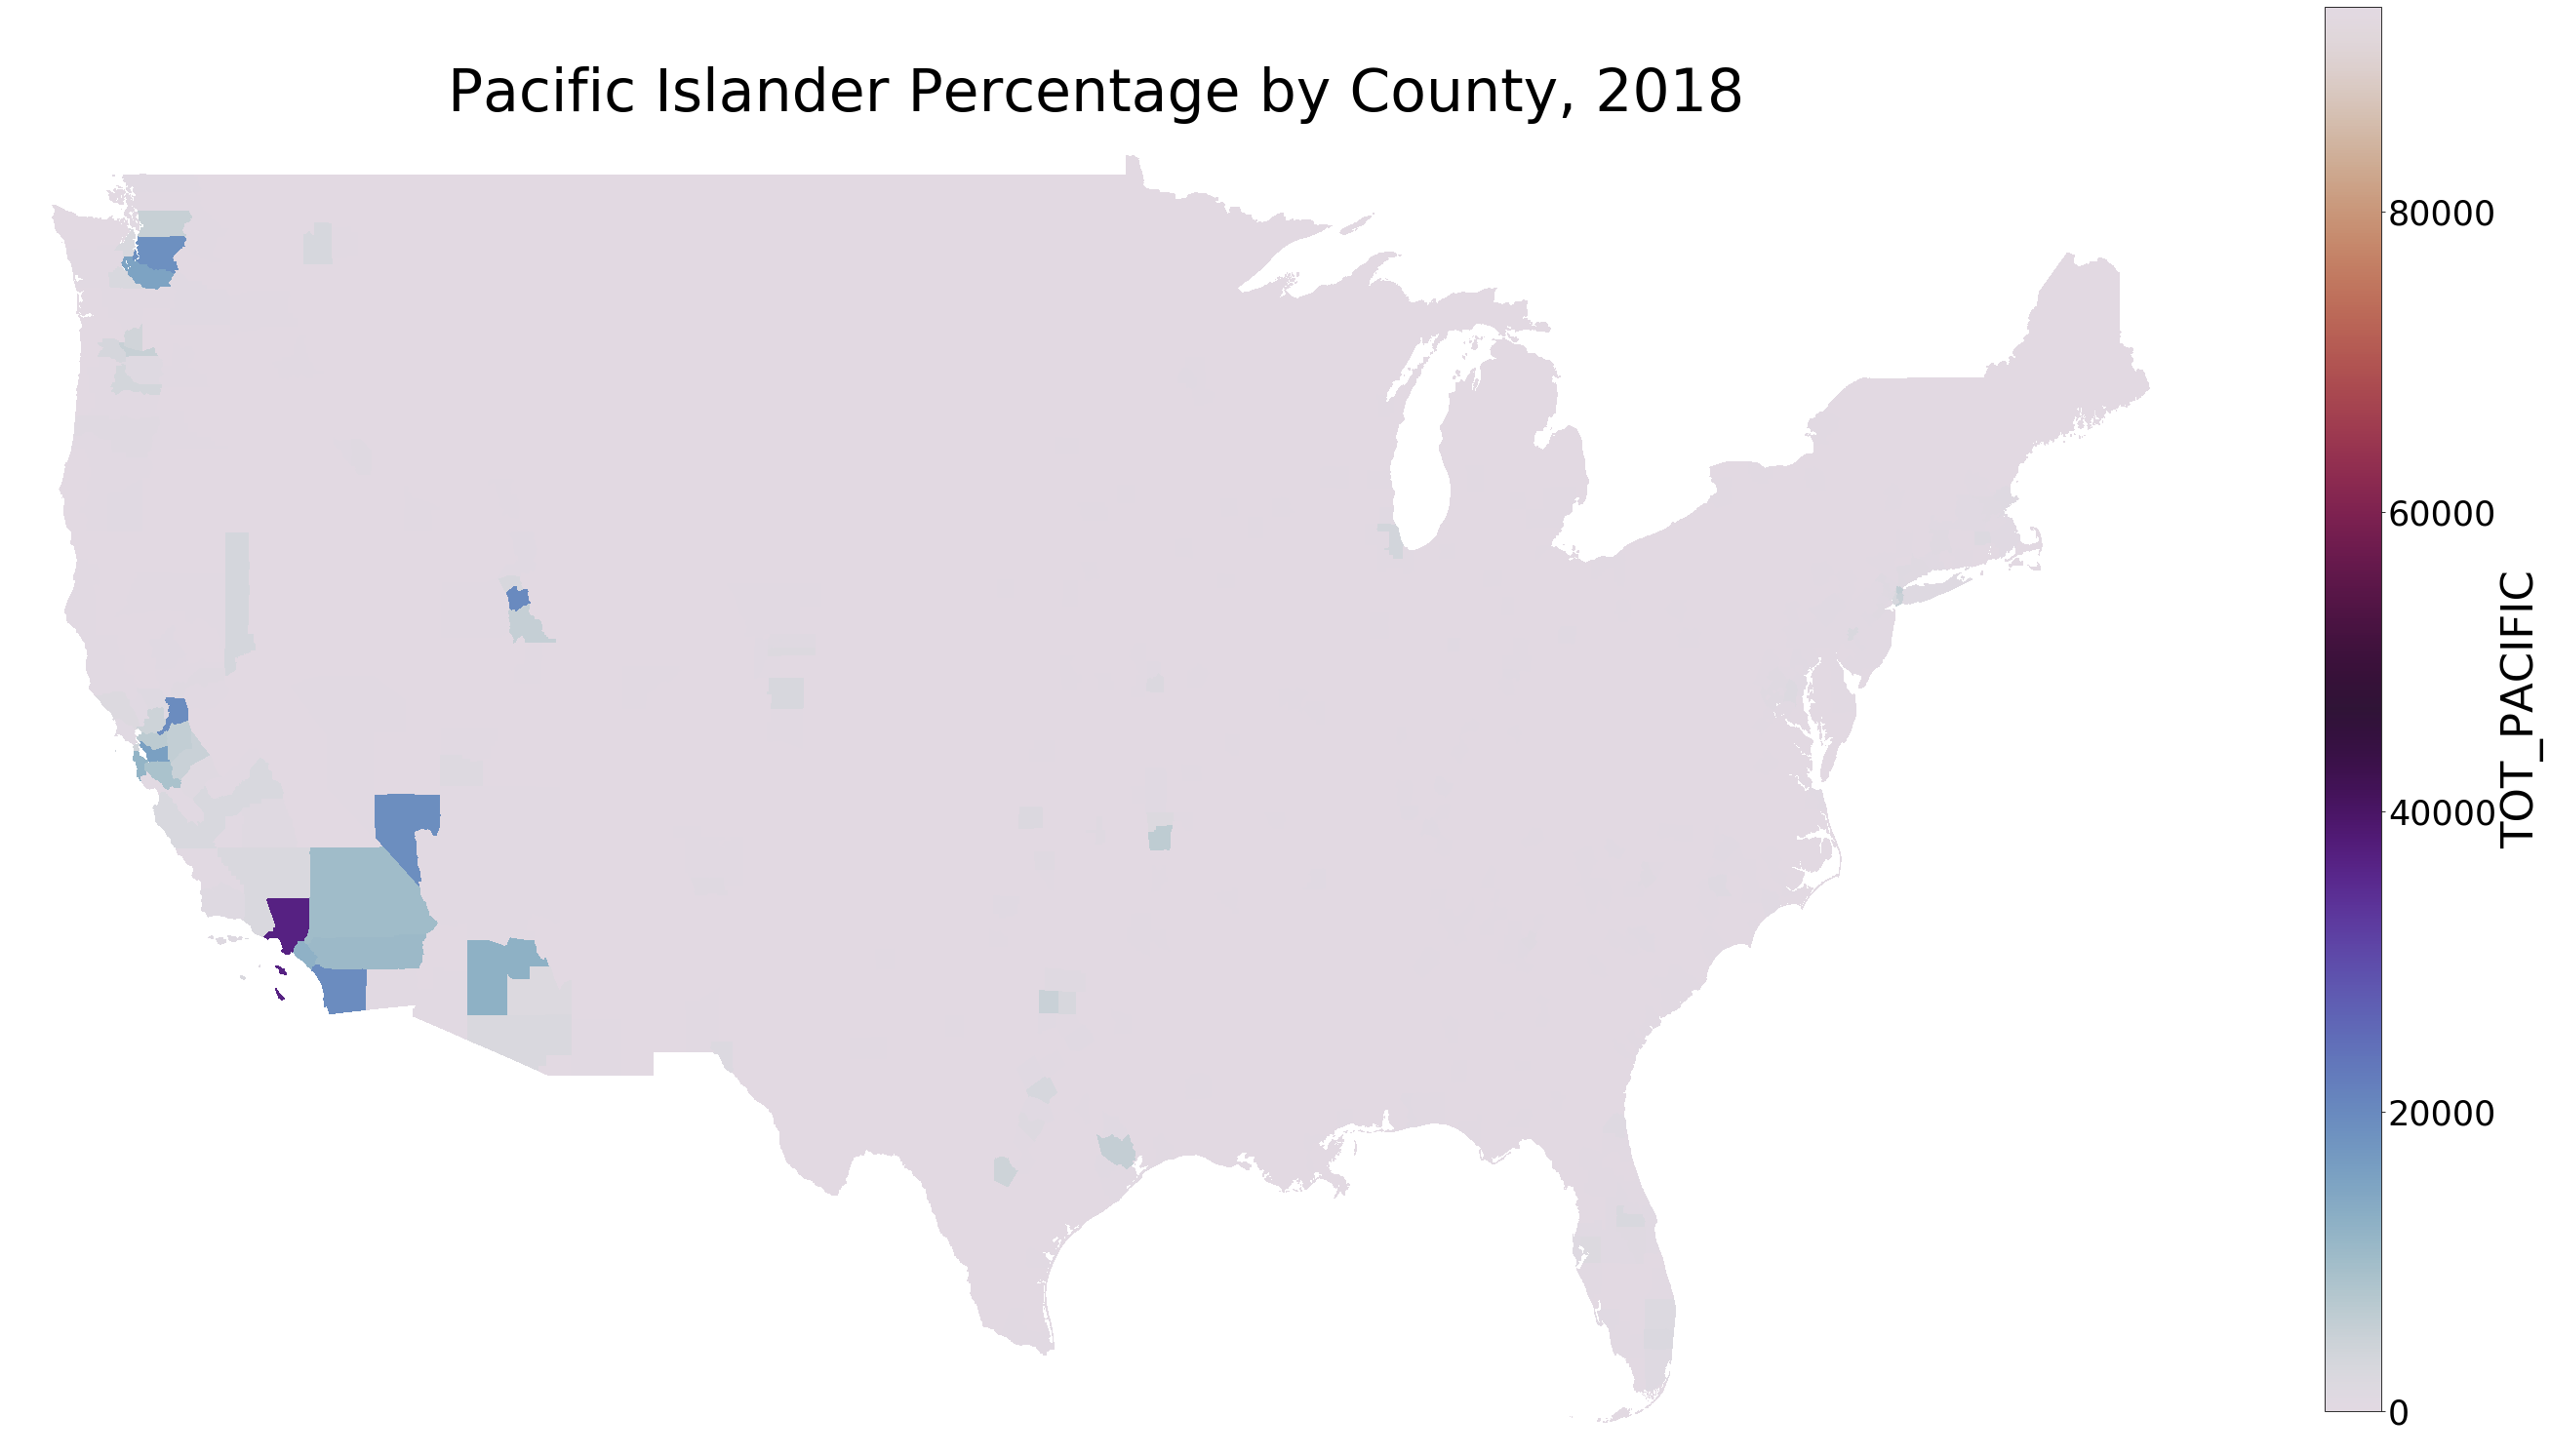

In [36]:
choropleth(df, 'TOT_PACIFIC', '2018', 'twilight',title='Pacific Islander Percentage')

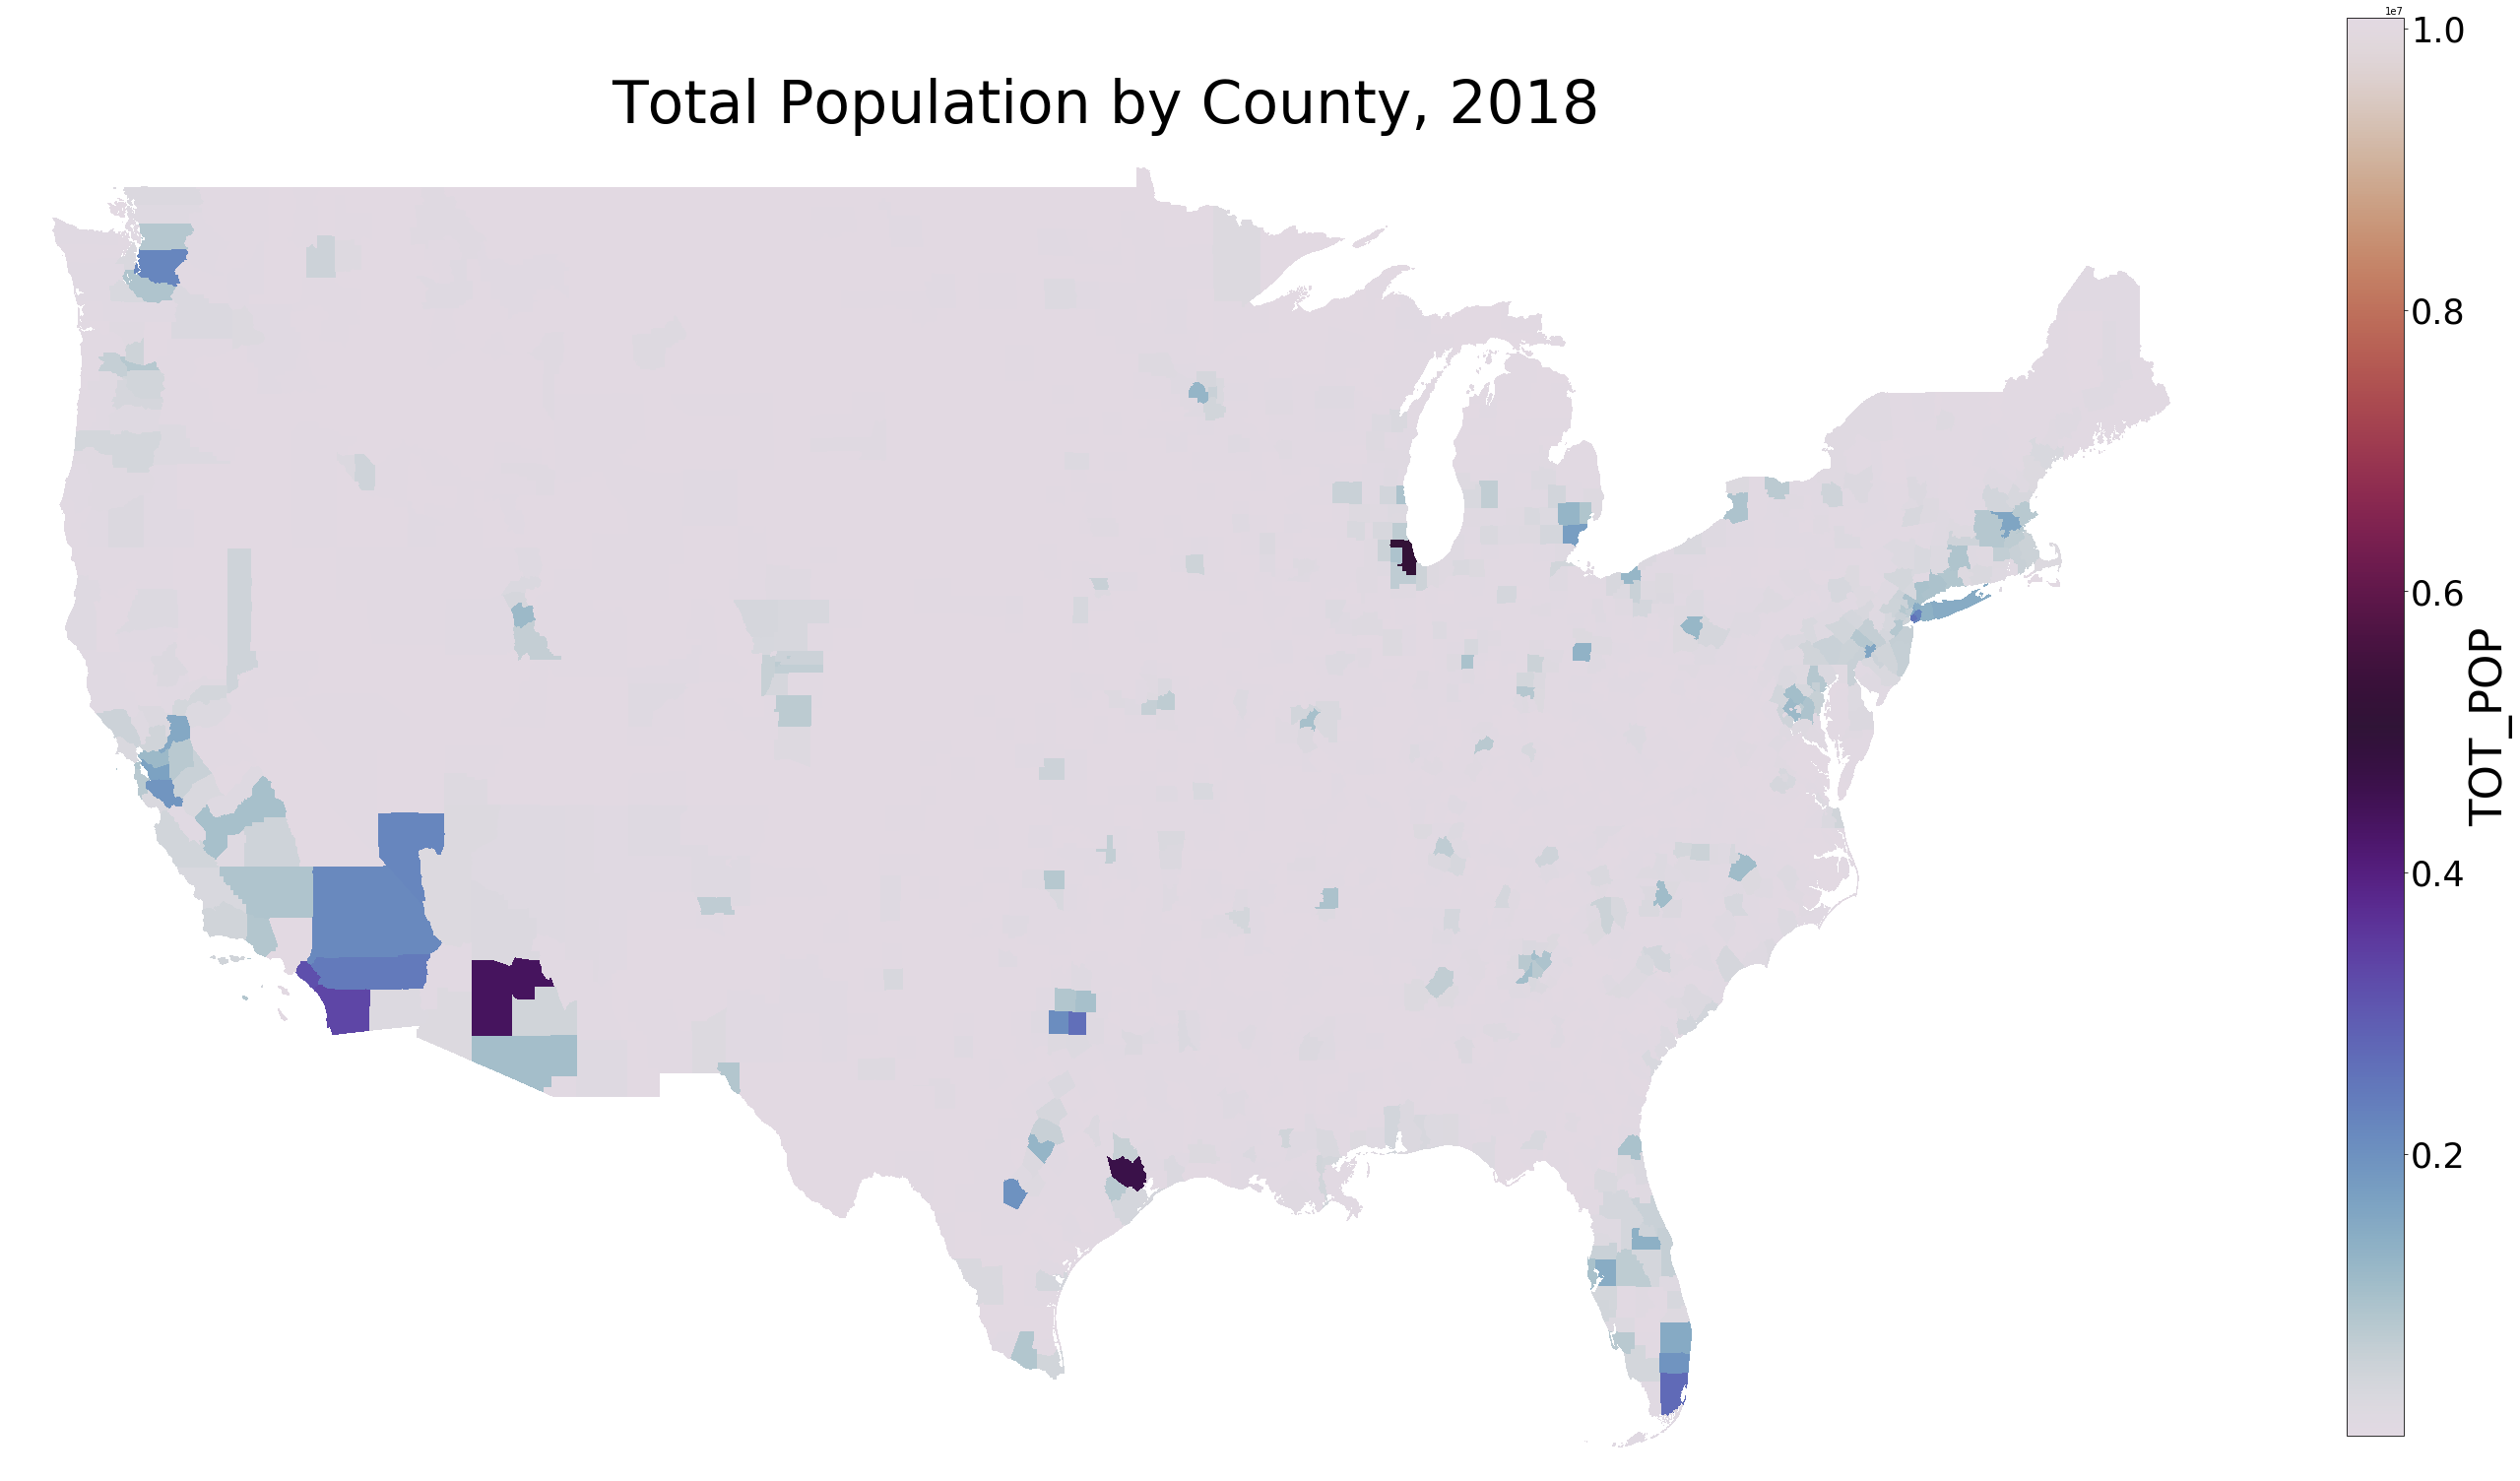

In [34]:
choropleth(df, 'TOT_POP', '2018', 'twilight',title='Total Population')

In [37]:
def choropleth(df, feature, year, cmap, title=None):
    '''sdf '''
    
    map_df = df[df.Year == year]
    # Read shapefile using Geopandas
    shape_df = gpd.read_file('../datasets/shapefile/cb_2018_us_county_500k.shp')
    geo_df = shape_df.merge(map_df, left_on='GEOID', right_on='FIPS')
    
    fig, ax = plt.subplots(figsize = (40,40))
    vmin = geo_df[feature].min()
    vmax = geo_df[feature].max()
    geo_df.plot(ax=ax, column =feature, cmap=cmap, legend = False,antialiased=False)
    if title:
        ax.set_title(title+" by County, "+year, fontdict={'fontsize': 60}, loc='center')
    else:
        ax.set_title(feature+", "+year, fontdict={'fontsize': 60}, loc='center')
    ax.set(xlim=(-126, -66), ylim=(24, 50));
    plt.xticks([], [])
    plt.yticks([], [])
    cax = fig.add_axes([.95, 0.28, 0.02, 0.5])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax)
    cbr.set_label(feature, size=45)
    cbr.ax.tick_params(labelsize=35) 
    ax.set_axis_off()
    # ax.annotate("__Optional Annotation__", xy=(0.25, .1), size=20, xycoords='figure fraction')
    # plt.savefig('population.png',format = 'png',bbox_inches='tight')

# Question 3: How does food insecurity rate relate to each of the other features?